# Wine Quality Data - Progetto EDA, Classificazione, Regressione e Clustering
Questo notebook analizza il dataset sulla qualità del vino disponibile su Kaggle: https://www.kaggle.com/datasets/subhajournal/wine-quality-data-combined. 

## Obiettivi:
- EDA (Analisi Esplorativa dei Dati)
- Classificazione binaria (Rosso vs Bianco)
- Regressione (predizione qualità [3,9])
- Clustering (segmentazione non supervisionata)

## Installazione pacchetti necessari

In [124]:
%pip install --upgrade pip
%pip install kagglehub
%pip install pandas
%pip install -U jupyter ipywidgets
%pip install -U jupyterlab-widgets
%pip install seaborn
%pip install scikit-learn
%pip install imbalanced-learn
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 19.2 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.7
    Uninstalling ipywidgets-8.1.7:
      Successfully uninstalled ipywidgets-8.1.7
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 914.9/914.9 kB 13.9 MB/s  0:00:00
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.15
    Uninstalling jupyterlab_widgets-3.0.15:
      Successfully uninstalled jupyterlab_widgets-3.0.15
  Rolling back uninstall of jupyterlab_widgets
  Moving to c:\users\lory8\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages\jupyterlab_widgets-3.0.15.dist-info\
   from C:\Users\lory8\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\~upyterlab_widgets-3.0.15.dist-info
  Moving to c:\users\lory8\appdata\local\packages\pythonsoftwarefoundation.python.3.12_qbz5n2kfra8p0\localcache\local-packages\python312\site-packages\j

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\lory8\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\share\\jupyter\\labextensions\\@jupyter-widgets\\jupyterlab-manager\\static\\packages_base_lib_index_js-webpack_sharing_consume_default_jquery_jquery.5dd13f8e980fa3c50bfe.js'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Importazione librerie

In [125]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import math
from matplotlib import gridspec

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.model_selection import KFold


from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, f1_score,
    mean_squared_error, mean_absolute_error, r2_score,
    roc_curve, auc,
    silhouette_score
)

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

warnings.filterwarnings("ignore")

## Importazione dataset

In [126]:
path = kagglehub.dataset_download("subhajournal/wine-quality-data-combined")
file_path = os.path.join(path, "WineQuality.csv")

# Carica il dataset
df = pd.read_csv(file_path)

print(f"Numero di righe nel dataset: {df.shape[0]}")

df.head()

Numero di righe nel dataset: 32485


Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        2732            7.4             0.170         0.29             1.4   
1        2607            5.3             0.310         0.38            10.5   
2        1653            4.7             0.145         0.29             1.0   
3        3264            6.9             0.260         0.29             4.2   
4        4931            6.4             0.450         0.07             1.1   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.047                 23.0                 107.0  0.99390  3.52   
1      0.031                 53.0                 140.0  0.99321  3.34   
2      0.042                 35.0                  90.0  0.99080  3.76   
3      0.043                 33.0                 114.0  0.99020  3.16   
4      0.030                 10.0                 131.0  0.99050  2.97   

   sulphates  alcohol  quality        Type  
0       0.65     10.4        6  White Wine  
1       0.46     11.7        6  White Wine  
2       0.49     11.3        6  White Wine  
3       0.31     12.5        6  White Wine  
4       0.28     10.8        5  White Wine

## Analisi Esplorativa

In [127]:
print(f"Numero di colonne nel dataset: {df.shape[1]}")

print("\nTipi di dati:")
print(df.dtypes)

print("\nValori mancanti per colonna:")
print(df.isnull().sum())

Numero di colonne nel dataset: 14

Tipi di dati:
Unnamed: 0                int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Type                     object
dtype: object

Valori mancanti per colonna:
Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64


In [ ]:
# Statistiche descrittive per variabili numeriche
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Unnamed: 0' in numeric_columns:
    numeric_columns.remove('Unnamed: 0') 

print("\nStatistiche descrittive per variabili numeriche:")
print(df[numeric_columns].describe())


Statistiche descrittive per variabili numeriche:
       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   32485.000000      32485.000000  32485.000000    32485.000000   
mean        7.214736          0.340122      0.318324        5.438696   
std         1.308216          0.164912      0.145152        4.799221   
min         3.800000          0.080000      0.000000        0.600000   
25%         6.400000          0.230000      0.250000        1.800000   
50%         7.000000          0.290000      0.310000        3.000000   
75%         7.700000          0.410000      0.390000        8.100000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  32485.000000         32485.000000          32485.000000  32485.000000   
mean       0.056009            30.458258            115.656303      0.994719   
std        0.034503            17.608076             56.45607

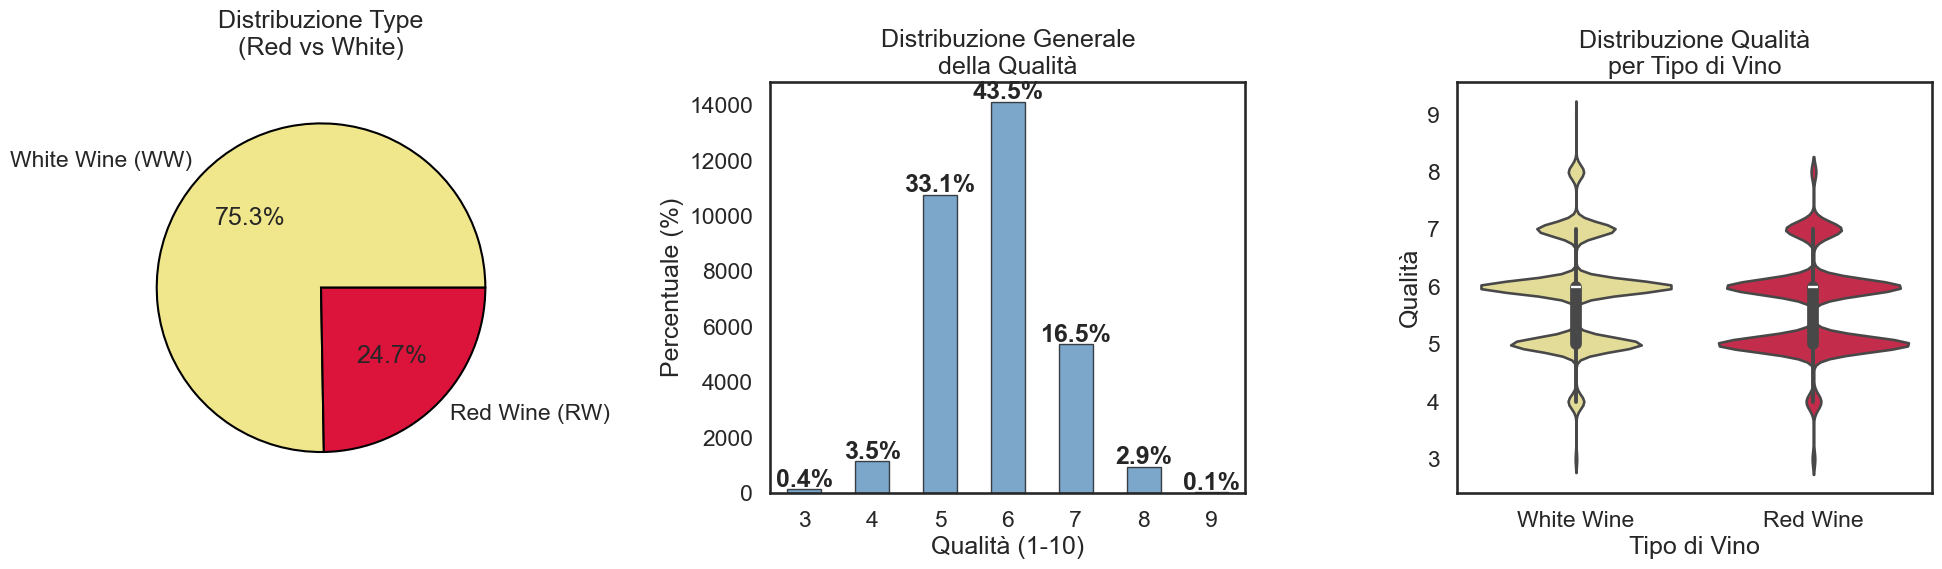

In [129]:
# Conta le occorrenze di ciascun tipo di vino
type_counts = df['Type'].value_counts()
quality_counts = df['quality'].value_counts().sort_index()

# Creazione figura con subplot 1x3
plt.figure(figsize=(20, 6))

# Subplot 1: Pie chart della distribuzione Type
plt.subplot(1, 3, 1)
type_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['White Wine (WW)', 'Red Wine (RW)'],
    colors=['khaki', 'crimson'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)
plt.title('Distribuzione Type\n(Red vs White)', pad=20)
plt.ylabel('')

# Subplot 2: Distribuzione generale della qualità
plt.subplot(1, 3, 2)
quality_counts.plot(kind='bar', color='steelblue', alpha=0.7, edgecolor='black', linewidth=1)
plt.title('Distribuzione Generale\ndella Qualità')
plt.xlabel('Qualità (1-10)')
plt.ylabel('Percentuale (%)')
plt.xticks(rotation=0)

# Calcola percentuali
total_wines = quality_counts.sum()
for i, v in enumerate(quality_counts.values):
    percentage = (v / total_wines) * 100
    plt.text(i, v + 100, f'{percentage:.1f}%', ha='center', fontweight='bold')

# Subplot 3: Violin plot della qualità per tipo
plt.subplot(1, 3, 3)
sns.violinplot(data=df, x='Type', y='quality', palette=['khaki', 'crimson'])
plt.title('Distribuzione Qualità\nper Tipo di Vino')
plt.xlabel('Tipo di Vino')
plt.ylabel('Qualità')

# Aggiusta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

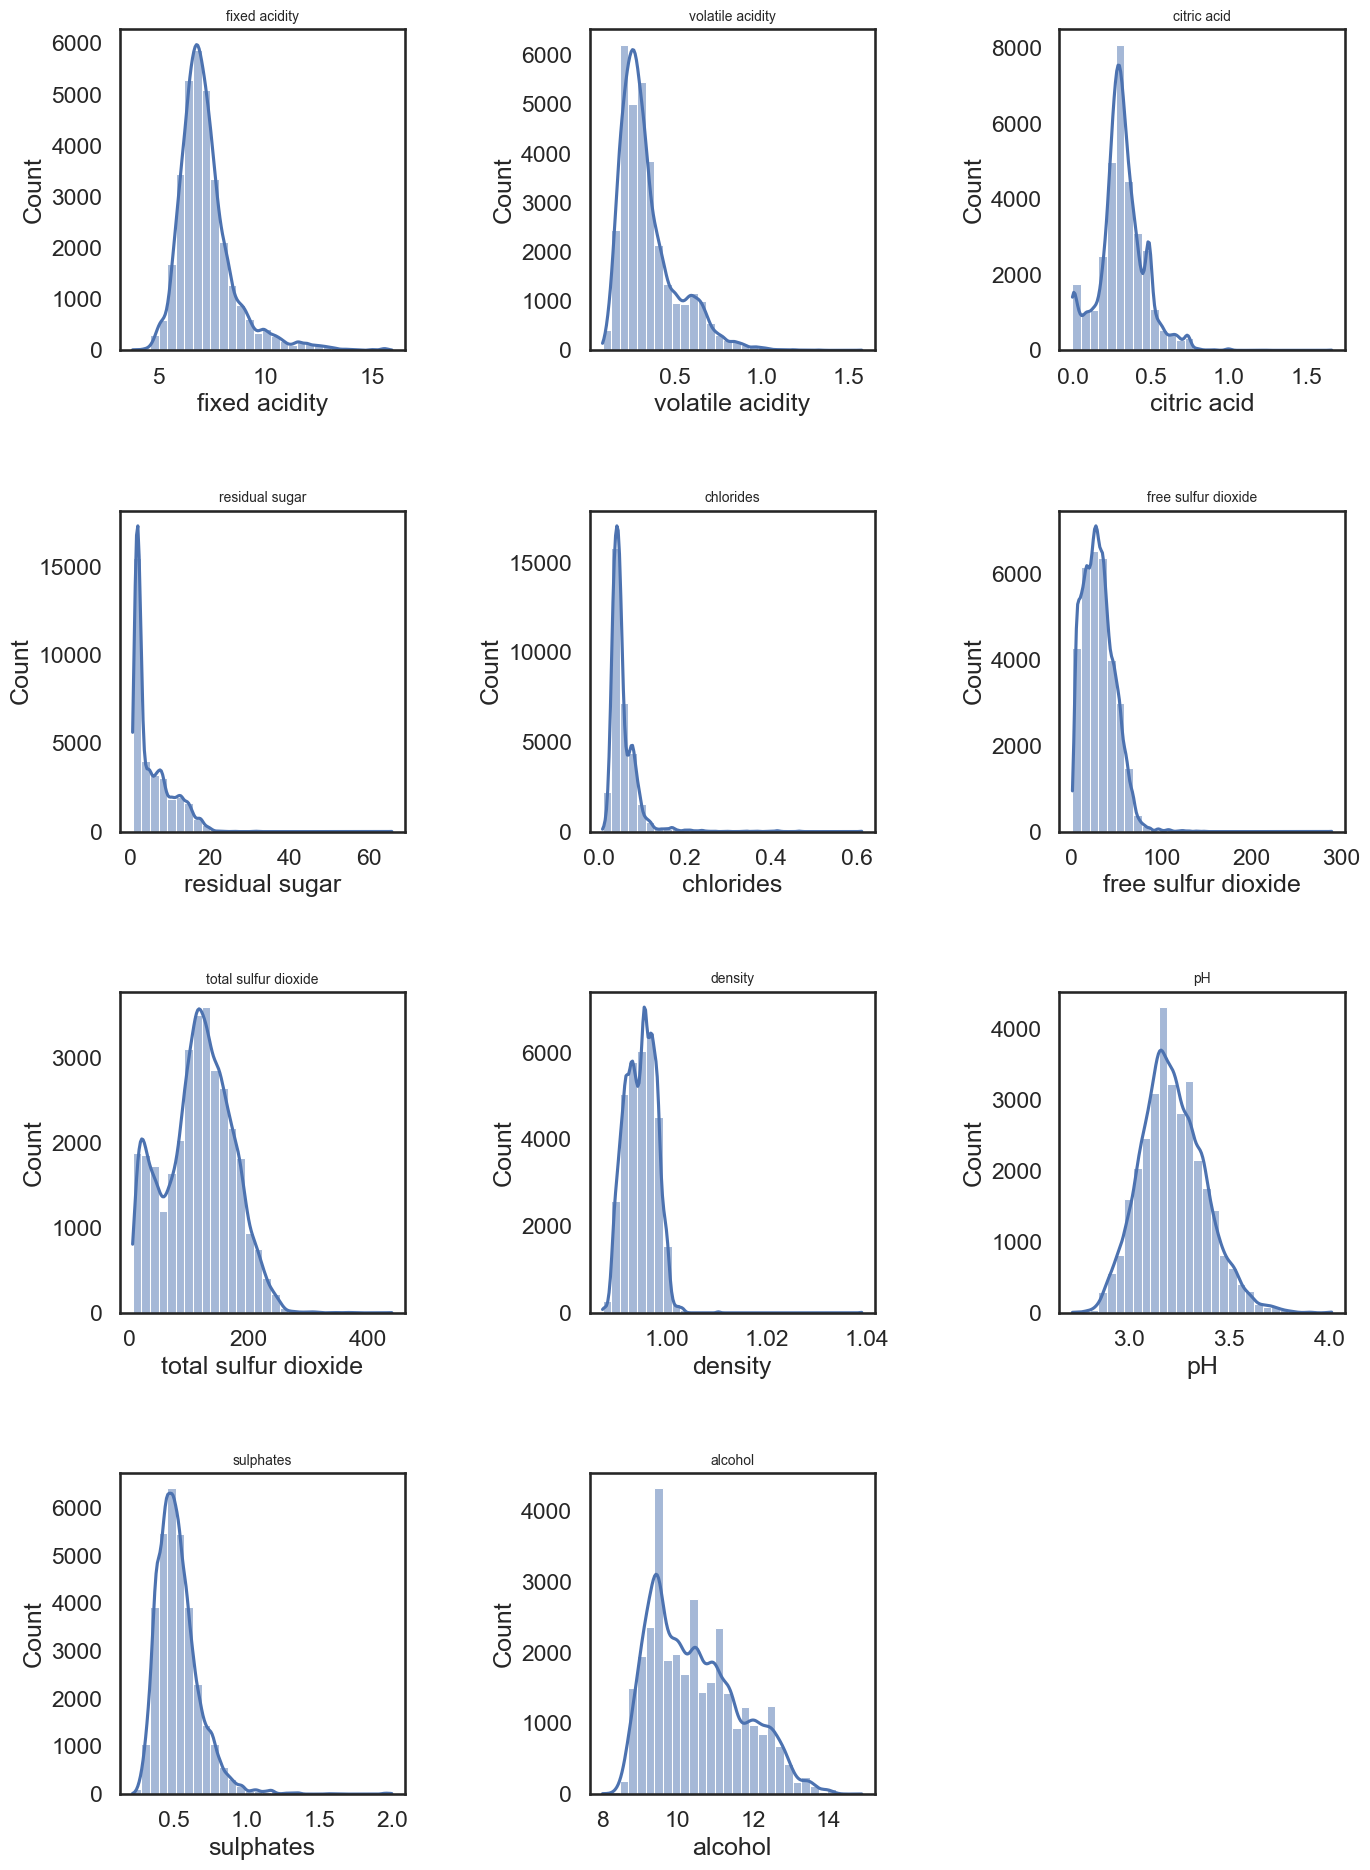

In [130]:
# Calcolo del numero di righe e colonne
n_cols = 3  
n_rows = math.ceil(len(numeric_columns) / n_cols)  

# Creazione della figura con dimensioni proporzionate
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numeric_columns):
    if col == 'quality':
        continue
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.histplot(df[col], kde=True, bins=30) 
    plt.title(f"{col}", fontsize=10) 
plt.tight_layout(pad=3)
plt.show()

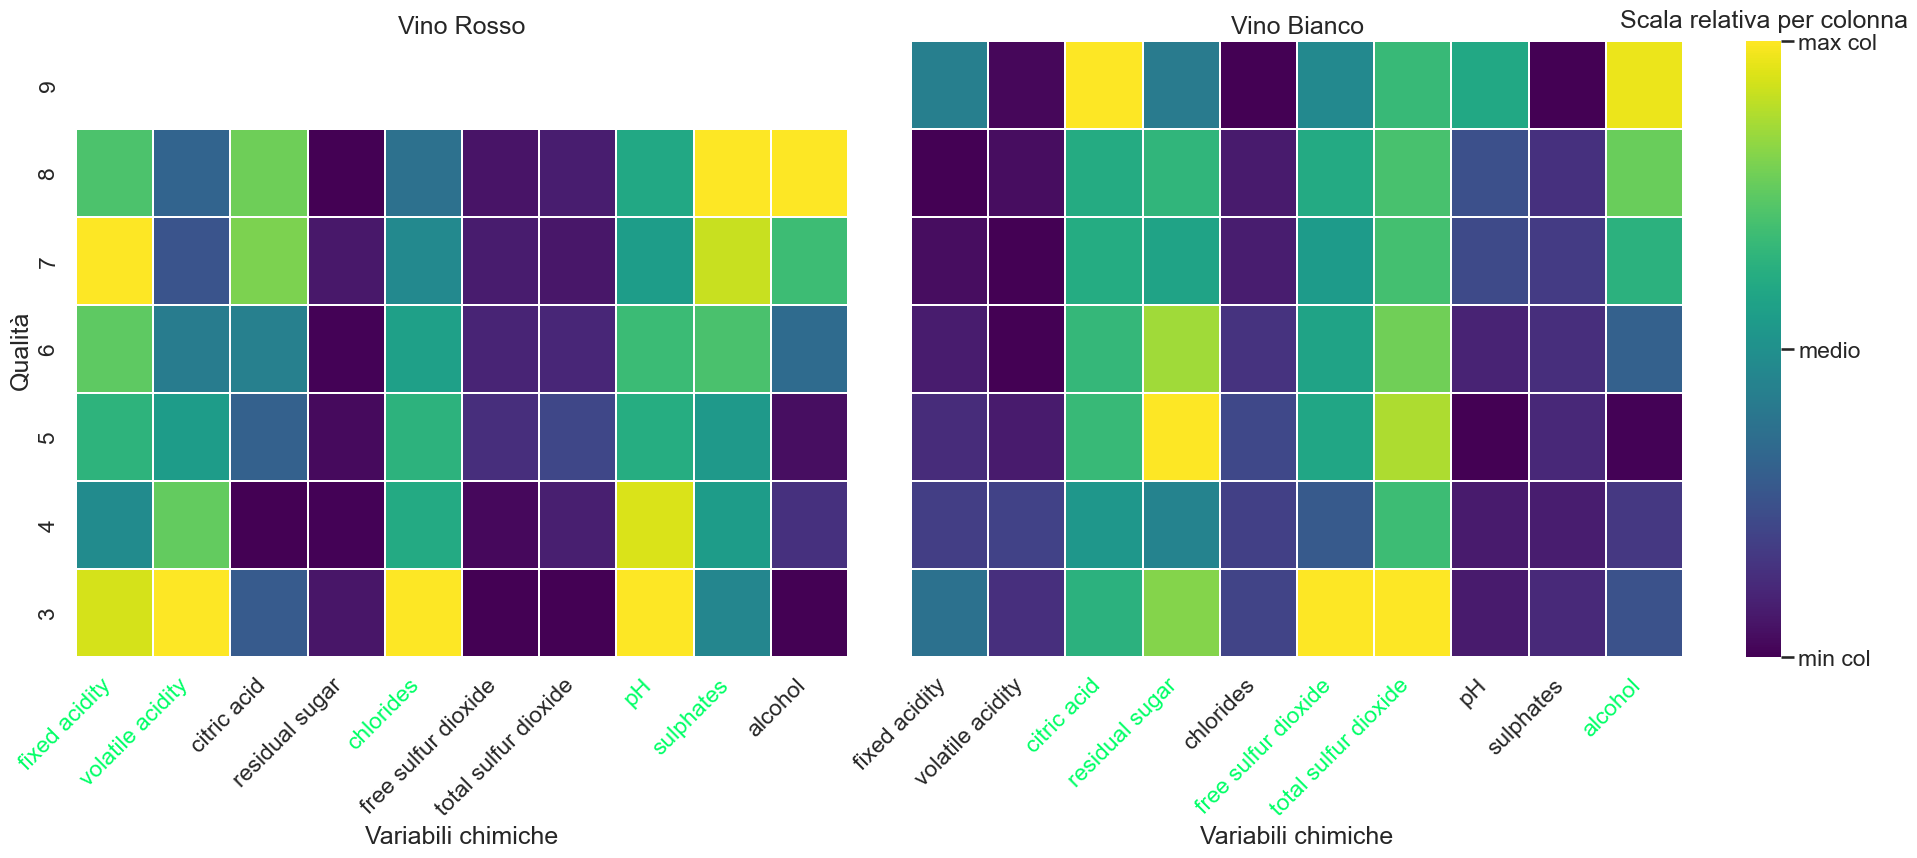

In [131]:
# Parametri base
type_col = 'Type'
types = ['Red Wine', 'White Wine']
chemical_cols = [c for c in [
    'fixed acidity','volatile acidity','citric acid','residual sugar',
    'chlorides','free sulfur dioxide','total sulfur dioxide',
    'pH','sulphates','alcohol'
] if c in df.columns]

# Medie reali per (tipo, qualità) 
agg = df.groupby([type_col, 'quality'])[chemical_cols].mean().reset_index()
qualities = sorted(agg['quality'].unique())

def pivot_one(kind):
    m = agg[agg[type_col].str.contains(kind, case=False, na=False)] \
          .set_index('quality')[chemical_cols]
    return m.reindex(index=qualities)

red_mat   = pivot_one(types[0])
white_mat = pivot_one(types[1])

# Normalizzazione colore colonna-per-colonna (rossi+bianchi)
def columnwise_scale(rmat, wmat, cols):
    r, w = rmat.astype(float).copy(), wmat.astype(float).copy()
    for col in cols:
        v = pd.concat([r[col], w[col]])
        cmin, cmax = np.nanmin(v.values), np.nanmax(v.values)
        if not np.isfinite(cmin) or not np.isfinite(cmax) or cmax == cmin:
            r[col] = np.nan; w[col] = np.nan
        else:
            r[col] = (r[col]-cmin)/(cmax-cmin)
            w[col] = (w[col]-cmin)/(cmax-cmin)
    return r, w

red_col, white_col = columnwise_scale(red_mat, white_mat, chemical_cols)

# Figura: 2 heatmap + colorbar a destra
sns.set_theme(style='white', context='talk')
fig = plt.figure(figsize=(22, 8))
gs  = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.045], wspace=0.12)
ax_r, ax_w, cax = fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,2])

h1 = sns.heatmap(red_col,  ax=ax_r, cmap='viridis', vmin=0, vmax=1, cbar=False,
                 linewidths=.35, linecolor='white')
h2 = sns.heatmap(white_col, ax=ax_w, cmap='viridis', vmin=0, vmax=1, cbar=True,
                 cbar_ax=cax, linewidths=.35, linecolor='white')

ax_r.invert_yaxis(); ax_w.invert_yaxis()

ax_r.set_title('Vino Rosso'); ax_w.set_title('Vino Bianco')
for ax in (ax_r, ax_w):
    ax.set_xlabel('Variabili chimiche')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax_r.set_ylabel('Qualità'); ax_w.set_ylabel(''); ax_w.set_yticklabels([])

cax.set_title('Scala relativa per colonna', pad=10)
cbar = h2.collections[0].colorbar
cbar.set_ticks([0, .5, 1.0]); cbar.set_ticklabels(['min col', 'medio', 'max col'])

# Evidenzia in verde chi ha media più alta per colonna (rosso vs bianco)
red_mean, white_mean = red_mat.mean(0), white_mat.mean(0)
win_red   = {c for c in chemical_cols if red_mean[c]   > white_mean[c]}
win_white = {c for c in chemical_cols if white_mean[c] > red_mean[c]}

def color_xticklabels(ax, winners, green='#00FF66'):
    for t in ax.get_xticklabels():
        if t.get_text() in winners: t.set_color(green)

color_xticklabels(ax_r, win_red)
color_xticklabels(ax_w, win_white)

plt.tight_layout()
plt.show()


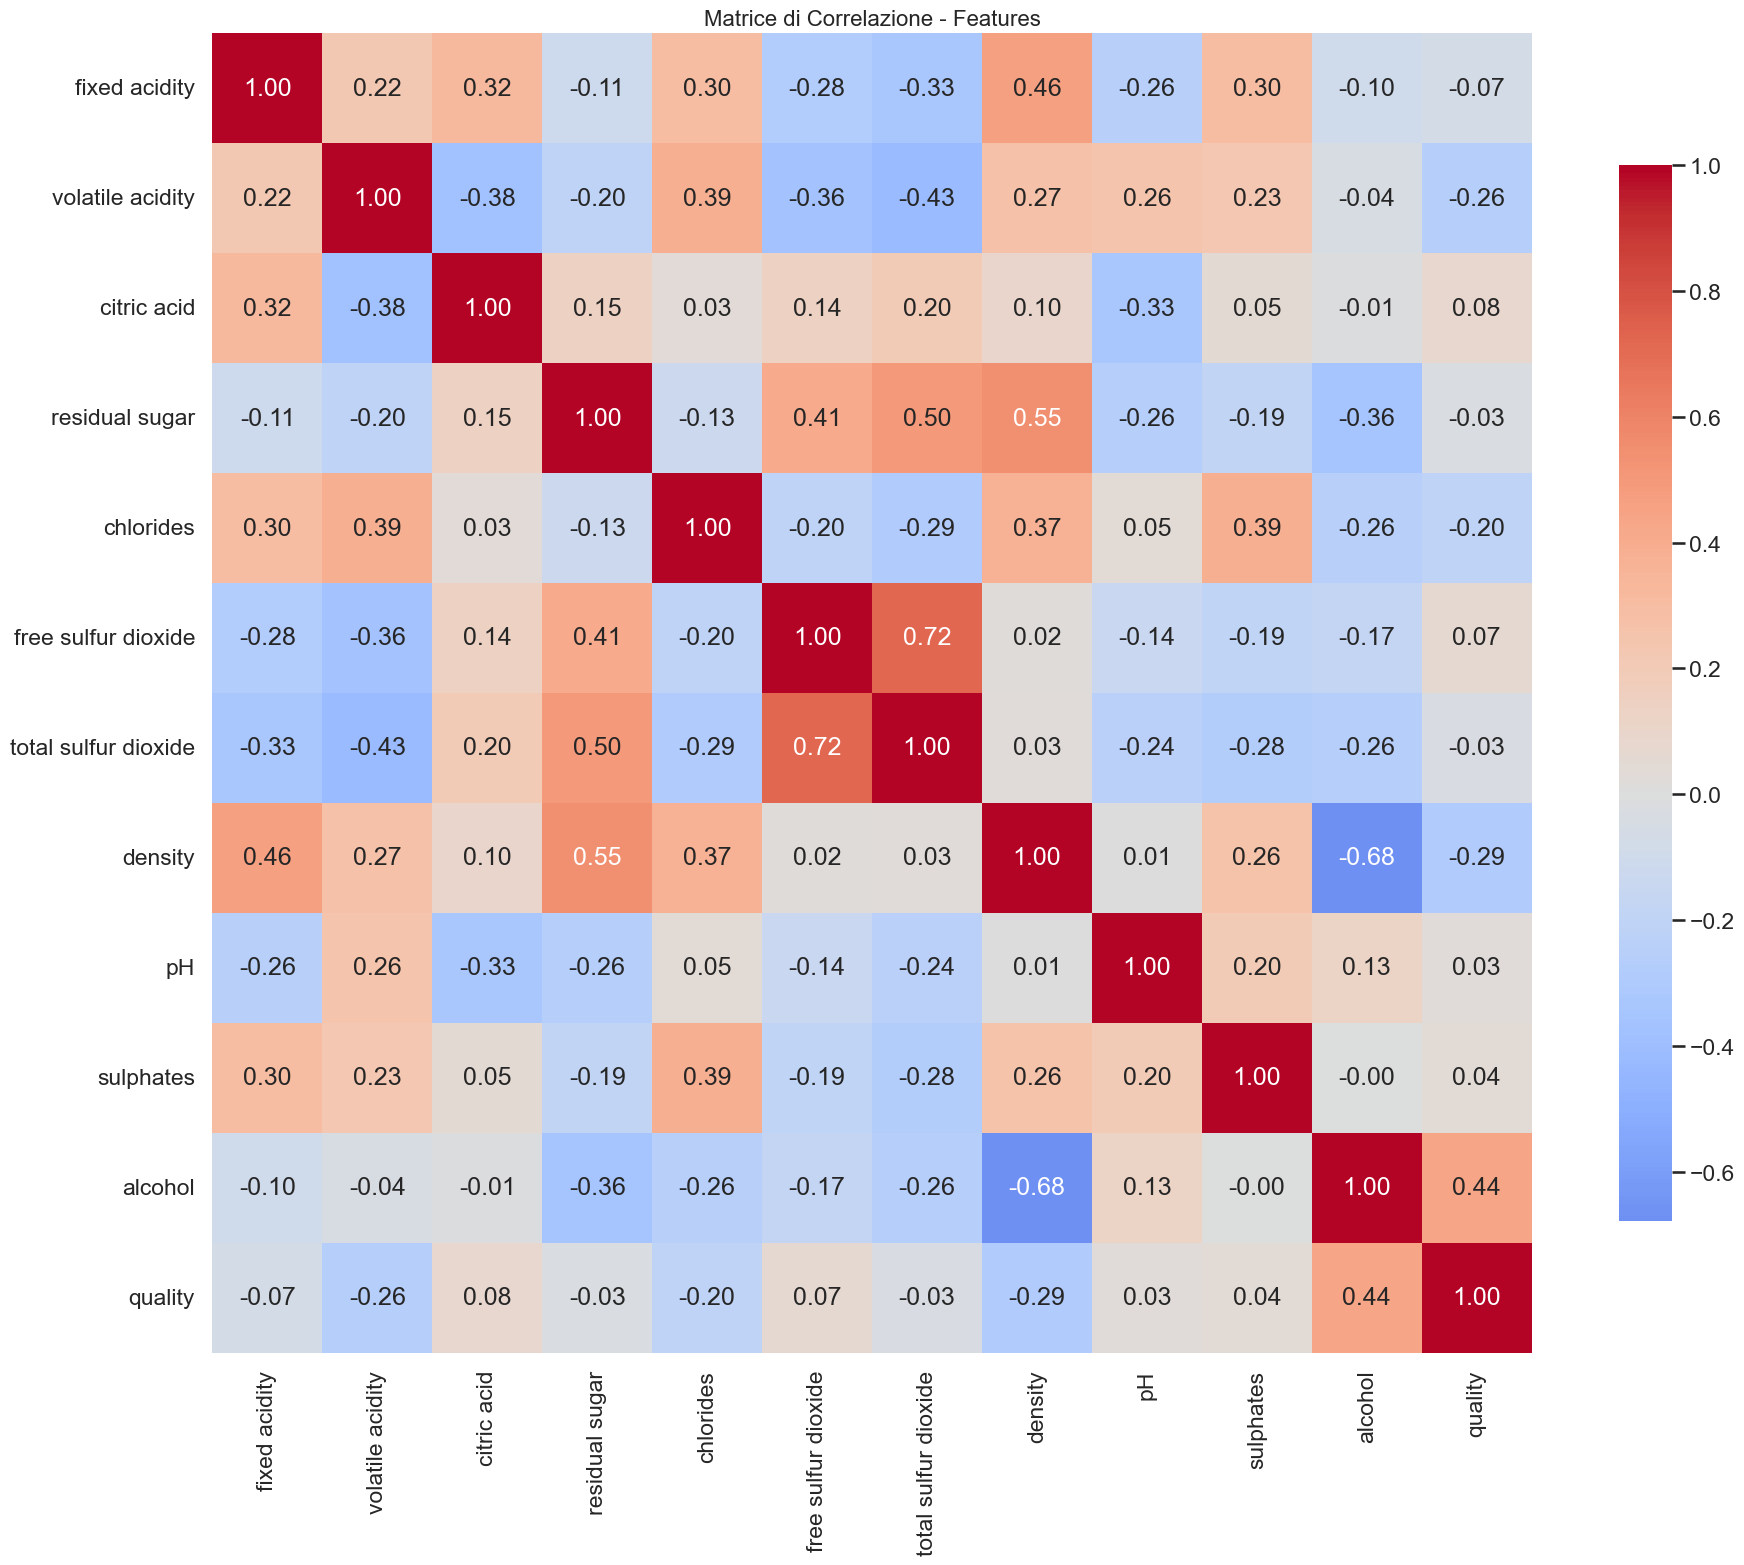

Coppie di features con correlazione > 0.5:
free sulfur dioxide - total sulfur dioxide: 0.722
density - alcohol: -0.678
residual sugar - density: 0.554


In [132]:
# Matrice di correlazione delle features originali
plt.figure(figsize=(20, 16))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Matrice di Correlazione - Features', fontsize=16)
plt.tight_layout()
plt.show()

# Identifica le coppie di features più correlate
def find_high_correlations(corr_matrix, threshold=0.5):
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val > threshold:
                high_corr.append({
                    'feature1': corr_matrix.columns[i],
                    'feature2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    return sorted(high_corr, key=lambda x: abs(x['correlation']), reverse=True)

high_correlations = find_high_correlations(correlation_matrix, threshold=0.5)
print("Coppie di features con correlazione > 0.5:")
for item in high_correlations[:10]:  # Mostra solo le prime 10
    print(f"{item['feature1']} - {item['feature2']}: {item['correlation']:.3f}")

In [133]:
# RIMOZIONE FEATURES CORRELATE

# Definizione features da eliminare
features_to_drop = ['free sulfur dioxide', 'density', 'Unnamed: 0']

# Aggiorniamo il dataset rimuovendo le features correlate
df = df.drop(columns=features_to_drop)
numeric_columns = [col for col in numeric_columns if col not in features_to_drop]

print("\nVERIFICA MODIFICHE:")
print(f"Shape originale: {df.shape}")
print(f"Features rimanenti ({len(numeric_columns)}): {numeric_columns}")
df.head()


VERIFICA MODIFICHE:
Shape originale: (32485, 11)
Features rimanenti (10): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality']


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4             0.170         0.29             1.4      0.047   
1            5.3             0.310         0.38            10.5      0.031   
2            4.7             0.145         0.29             1.0      0.042   
3            6.9             0.260         0.29             4.2      0.043   
4            6.4             0.450         0.07             1.1      0.030   

   total sulfur dioxide    pH  sulphates  alcohol  quality        Type  
0                 107.0  3.52       0.65     10.4        6  White Wine  
1                 140.0  3.34       0.46     11.7        6  White Wine  
2                  90.0  3.76       0.49     11.3        6  White Wine  
3                 114.0  3.16       0.31     12.5        6  White Wine  
4                 131.0  2.97       0.28     10.8        5  White Wine

## ETL

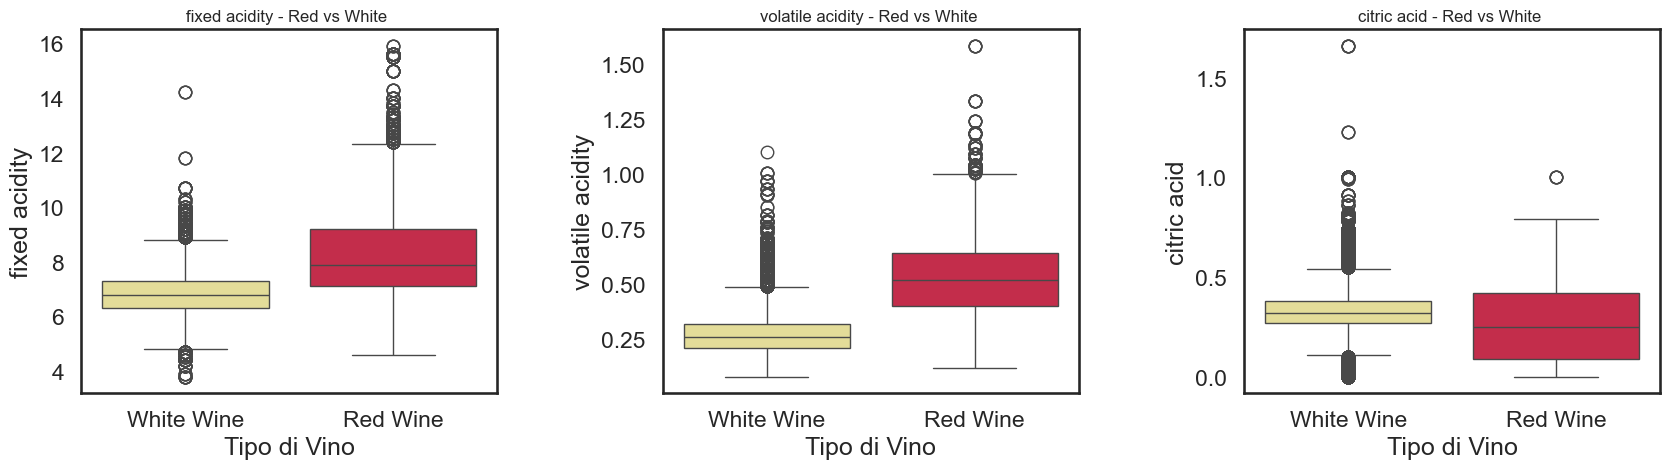

In [134]:
# Analisi comparativa per classificazione binaria: 
important_features = numeric_columns[:3]  
# Calcolo dinamico per la griglia
n_cols = 3
n_rows = math.ceil(len(important_features) / n_cols)

plt.figure(figsize=(18, 6 * n_rows))
for i, col in enumerate(important_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='Type', y=col, palette=[ 'khaki', 'crimson'])
    plt.title(f'{col} - Red vs White ', fontsize=12)
    plt.xlabel('Tipo di Vino')
    plt.ylabel(col)
plt.tight_layout(pad=3)
plt.show()

In [135]:
# Capping degli outlier usando l'IQR method
def cap_outliers_iqr(df, columns, factor=1.5):
    df_capped = df.copy()
    capping_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        # Conta outlier prima del capping
        lower_outliers = len(df[df[col] < lower_bound])
        upper_outliers = len(df[df[col] > upper_bound])
        total_outliers = lower_outliers + upper_outliers
        
        capping_info[col] = {
            'lower_outliers': lower_outliers,
            'upper_outliers': upper_outliers,
            'total_outliers': total_outliers,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
        
        # Applica capping
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_capped, capping_info

# Applica il capping degli outlier alle variabili numeriche
print(f"Dataset originale: {df.shape[0]} righe")

df_capped, capping_details = cap_outliers_iqr(df, numeric_columns, factor=1.5)

print(f"Dataset dopo capping outlier: {df_capped.shape[0]} righe (nessuna riga rimossa)")

print("\nOutlier cappati per colonna:")
for col, info in capping_details.items():
    if info['total_outliers'] > 0:
        print(f"{col}: {info['total_outliers']} outlier cappati")
        print(f"  - {info['lower_outliers']} sotto il limite inferiore ({info['lower_bound']:.2f})")
        print(f"  - {info['upper_outliers']} sopra il limite superiore ({info['upper_bound']:.2f})")

Dataset originale: 32485 righe
Dataset dopo capping outlier: 32485 righe (nessuna riga rimossa)

Outlier cappati per colonna:
fixed acidity: 1758 outlier cappati
  - 34 sotto il limite inferiore (4.45)
  - 1724 sopra il limite superiore (9.65)
volatile acidity: 1564 outlier cappati
  - 0 sotto il limite inferiore (-0.04)
  - 1564 sopra il limite superiore (0.68)
citric acid: 2601 outlier cappati
  - 1429 sotto il limite inferiore (0.04)
  - 1172 sopra il limite superiore (0.60)
residual sugar: 616 outlier cappati
  - 0 sotto il limite inferiore (-7.65)
  - 616 sopra il limite superiore (17.55)
chlorides: 1426 outlier cappati
  - 0 sotto il limite inferiore (-0.00)
  - 1426 sopra il limite superiore (0.11)
total sulfur dioxide: 39 outlier cappati
  - 0 sotto il limite inferiore (-41.50)
  - 39 sopra il limite superiore (274.50)
pH: 362 outlier cappati
  - 25 sotto il limite inferiore (2.79)
  - 337 sopra il limite superiore (3.63)
sulphates: 953 outlier cappati
  - 0 sotto il limite inf

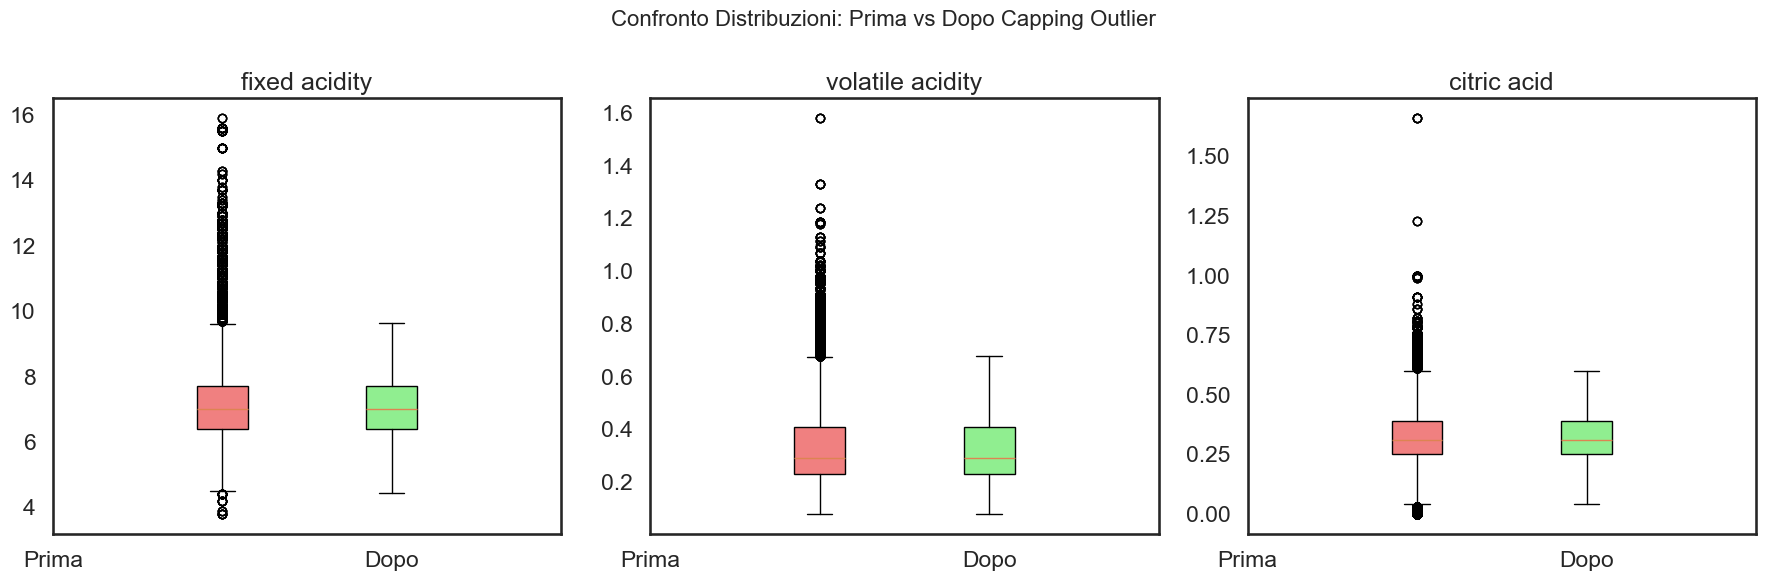

In [136]:
# Confronto distribuzioni prima e dopo il capping degli outlier
features_to_compare = numeric_columns[:3]  # prime 3 features

fig, axes = plt.subplots(1, len(features_to_compare), figsize=(18, 6))
fig.suptitle('Confronto Distribuzioni: Prima vs Dopo Capping Outlier', fontsize=16)

for i, col in enumerate(features_to_compare):
    # Boxplot prima
    axes[i].boxplot([df[col]], labels=['Prima'], patch_artist=True,
                    boxprops=dict(facecolor='lightcoral'))
    
    # Boxplot dopo posizionato a lato
    axes[i].boxplot([df_capped[col]], labels=['Dopo'], patch_artist=True,
                    boxprops=dict(facecolor='lightgreen'), positions=[1.5])
    
    axes[i].set_title(col)
    axes[i].set_xticks([0.5, 1.5])
    axes[i].set_xticklabels(['Prima', 'Dopo'])

plt.tight_layout()
plt.show()


In [137]:
# Verifica che non ci sia perdita di dati
print("Verifica integrità dei dati:")
print(f"Righe originali: {df.shape[0]}")
print(f"Righe dopo capping: {df_capped.shape[0]}")
print(f"Distribuzione target invariata: {df['Type'].equals(df_capped['Type'])}")

print("\nDistribuzione target (dovrebbe essere identica):")
print("Prima:", df['Type'].value_counts().sort_index())
print("Dopo: ", df_capped['Type'].value_counts().sort_index())

# Aggiorna il dataframe per le analisi successive
df_classification = df_capped.copy()
print(f"\nDataset per la classificazione binaria: {df_classification.shape}")

Verifica integrità dei dati:
Righe originali: 32485
Righe dopo capping: 32485
Distribuzione target invariata: True

Distribuzione target (dovrebbe essere identica):
Prima: Type
Red Wine       8032
White Wine    24453
Name: count, dtype: int64
Dopo:  Type
Red Wine       8032
White Wine    24453
Name: count, dtype: int64

Dataset per la classificazione binaria: (32485, 11)


In [138]:
# Split stratificato del dataset per classificazione
# Separazione features e target
X_cl = df_classification.drop(['Type'], axis=1, errors='ignore')  # Features 
y_cl = df_classification['Type']  # Target

# Label Encoding (0 = Red Wine, 1 = White Wine)
label_encoder_cl = LabelEncoder()
y_cl = pd.Series(label_encoder_cl.fit_transform(y_cl), index=y_cl.index)  # Salva l'encoding

# Verifica mapping
print("Classificazione binaria:")
print(f"Mapping classi: {dict(zip(label_encoder_cl.classes_, label_encoder_cl.transform(label_encoder_cl.classes_)))}")
print(f"Features shape: {X_cl.shape}")
print(f"Target shape: {y_cl.shape}")
print(f"Features: {list(X_cl.columns)}")

# Verifica valori target encodati
print("\nVERIFICA VALORI TARGET ENCODATI:")
print(f"Valori unici nel target: {y_cl.unique()}")
print(f"Distribuzione:\n{y_cl.value_counts()}")

# Split stratificato train/test 
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(
    X_cl, y_cl, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_cl  
)

print(f"\nTrain set: {X_train_cl.shape[0]} campioni")
print(f"Test set: {X_test_cl.shape[0]} campioni")

print(f"\nDistribuzione target nel train set:")
# Converto i valori numerici nelle etichette originali per maggiore leggibilità
y_train_classes = label_encoder_cl.inverse_transform(y_train_cl)
print(pd.Series(y_train_classes).value_counts(normalize=True))

print(f"\nDistribuzione target nel test set:")
y_test_classes = label_encoder_cl.inverse_transform(y_test_cl)
print(pd.Series(y_test_classes).value_counts(normalize=True))

Classificazione binaria:
Mapping classi: {'Red Wine': np.int64(0), 'White Wine': np.int64(1)}
Features shape: (32485, 10)
Target shape: (32485,)
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality']

VERIFICA VALORI TARGET ENCODATI:
Valori unici nel target: [1 0]
Distribuzione:
1    24453
0     8032
Name: count, dtype: int64

Train set: 22739 campioni
Test set: 9746 campioni

Distribuzione target nel train set:
White Wine    0.75276
Red Wine      0.24724
Name: proportion, dtype: float64

Distribuzione target nel test set:
White Wine    0.752719
Red Wine      0.247281
Name: proportion, dtype: float64


In [139]:
# Separazione features e target per regressione
X_reg = df.drop(['Type', 'quality'], axis=1, errors='ignore')
y_reg = df['quality']

print(f"Features per regressione: {X_reg.columns.tolist()}")
print(f"Shape features: {X_reg.shape}")
print(f"Shape target: {y_reg.shape}")

# Split train/test per regressione
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, 
    y_reg,
    test_size=0.3,
    random_state=42  # Manteniamo lo stesso seed per riproducibilità
)

print("\nDistribuzioni del target (quality):")
print(f"Training set (media): {y_train_reg.mean():.2f}")
print(f"Test set (media): {y_test_reg.mean():.2f}")

print("\nStatistiche split:")
print(f"Training set: {X_train_reg.shape[0]} campioni ({X_train_reg.shape[0]/len(X_reg)*100:.1f}%)")
print(f"Test set: {X_test_reg.shape[0]} campioni ({X_test_reg.shape[0]/len(X_reg)*100:.1f}%)")

Features per regressione: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
Shape features: (32485, 9)
Shape target: (32485,)

Distribuzioni del target (quality):
Training set (media): 5.81
Test set (media): 5.81

Statistiche split:
Training set: 22739 campioni (70.0%)
Test set: 9746 campioni (30.0%)


In [140]:
# Normalizzazione delle features (fit solo su train, transform su entrambi)
scaler = MinMaxScaler()

# Fit del scaler solo sui dati di training
X_train_cl_scaled = scaler.fit_transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

# Conversione in DataFrame per mantenere i nomi delle colonne
X_train_cl_scaled = pd.DataFrame(X_train_cl_scaled, columns=X_cl.columns, index=X_train_cl.index)
X_test_cl_scaled = pd.DataFrame(X_test_cl_scaled, columns=X_cl.columns, index=X_test_cl.index)

print("Normalizzazione completata!")
print(f"Range features train dopo normalizzazione:")
print(f"Min: {X_train_cl_scaled.min().min():.3f}")
print(f"Max: {X_train_cl_scaled.max().max():.3f}")

Normalizzazione completata!
Range features train dopo normalizzazione:
Min: 0.000
Max: 1.000


In [141]:
# Fit del scaler solo sui dati di training
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Conversione in DataFrame per mantenere i nomi delle colonne
X_train_reg_scaled = pd.DataFrame(X_train_reg_scaled, columns=X_reg.columns, index=X_train_reg.index)
X_test_reg_scaled = pd.DataFrame(X_test_reg_scaled, columns=X_reg.columns, index=X_test_reg.index)

print("Normalizzazione completata!")
print(f"Range features train dopo normalizzazione:")
print(f"Min: {X_train_reg_scaled.min().min():.3f}")
print(f"Max: {X_train_reg_scaled.max().max():.3f}")

Normalizzazione completata!
Range features train dopo normalizzazione:
Min: 0.000
Max: 1.000


In [142]:
# OVERSAMPLING CLASSE MINORITARIA CON SMOTE

# Applicazione di SMOTE al training set
print(f"\nApplicazione SMOTE al training set per la classificazione...")
print(f"Shape training set prima SMOTE: {X_train_cl_scaled.shape}")

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_cl_resampled, y_train_cl_resampled = smote.fit_resample(X_train_cl_scaled, y_train_cl)

print(f"Shape training set dopo SMOTE: {X_train_cl_resampled.shape}")

# Verifica del nuovo bilanciamento
print("\n Distribuzione classi DOPO l'oversampling:")
print("Training set resampled:")
print(pd.Series(y_train_cl_resampled).value_counts())
print(f"Proporzione: {pd.Series(y_train_cl_resampled).value_counts(normalize=True)}")

print(f"\nIncremento campioni: +{len(X_train_cl_resampled) - len(X_train_cl_scaled)} campioni")
print(f"Incremento percentuale: {((len(X_train_cl_resampled)/len(X_train_cl_scaled))-1)*100:.1f}%")

# Converti in DataFrame mantenendo i nomi delle colonne
X_train_cl_resampled = pd.DataFrame(X_train_cl_resampled, columns=X_train_cl_scaled.columns)

# Mostra prime righe del dataset resampled
print("\nPrime righe del dataset resampled:")
display(X_train_cl_resampled.head())


Applicazione SMOTE al training set per la classificazione...
Shape training set prima SMOTE: (22739, 10)
Shape training set dopo SMOTE: (34234, 10)

 Distribuzione classi DOPO l'oversampling:
Training set resampled:
1    17117
0    17117
Name: count, dtype: int64
Proporzione: 1    0.5
0    0.5
Name: proportion, dtype: float64

Incremento campioni: +11495 campioni
Incremento percentuale: 50.6%

Prime righe del dataset resampled:


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.355769          0.033333     0.357143        0.318584   0.310881   
1       0.605769          0.566667     0.375000        0.194690   0.984456   
2       0.471154          0.250000     0.553571        0.371681   0.217617   
3       0.355769          0.250000     0.464286        0.070796   0.248705   
4       0.586538          0.266667     0.482143        0.737463   0.424870   

   total sulfur dioxide        pH  sulphates   alcohol  quality  
0              0.376164  0.946429   0.425197  0.416667    0.875  
1              0.312849  0.422619   0.551181  0.183333    0.375  
2              0.409683  0.005952   0.503937  0.500000    0.625  
3              0.316574  0.577381   0.283465  0.633333    0.625  
4              0.648045  0.303571   0.488189  0.183333    0.625

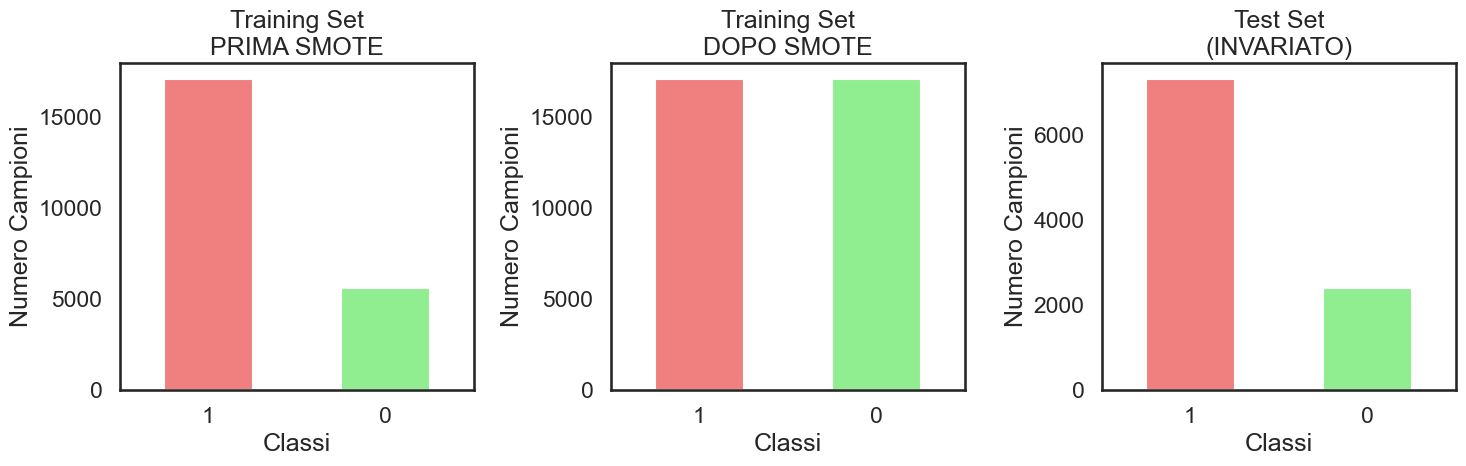


STATISTICHE RIASSUNTIVE:
Training originale: 22739 campioni
Training resampled: 34234 campioni
Test (invariato): 9746 campioni

Bilanciamento training prima: 17117/5622
Bilanciamento training dopo: 17117/17117


In [143]:
# VISUALIZZAZIONE CONFRONTO PRIMA/DOPO SMOTE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Grafico 1: Distribuzione originale training
y_train_cl.value_counts().plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightgreen'])
axes[0].set_title('Training Set\nPRIMA SMOTE')
axes[0].set_xlabel('Classi')
axes[0].set_ylabel('Numero Campioni')
axes[0].tick_params(axis='x', rotation=0)

# Grafico 2: Distribuzione dopo SMOTE training
pd.Series(y_train_cl_resampled).value_counts().plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightgreen'])
axes[1].set_title('Training Set\nDOPO SMOTE')
axes[1].set_xlabel('Classi')
axes[1].set_ylabel('Numero Campioni')
axes[1].tick_params(axis='x', rotation=0)


# Grafico 3: Test set (invariato)
y_test_cl.value_counts().plot(kind='bar', ax=axes[2], color=['lightcoral', 'lightgreen'])
axes[2].set_title('Test Set\n(INVARIATO)')
axes[2].set_xlabel('Classi')
axes[2].set_ylabel('Numero Campioni')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Statistiche riassuntive
print("\nSTATISTICHE RIASSUNTIVE:")
print("="*40)
print(f"Training originale: {len(X_train_cl_scaled)} campioni")
print(f"Training resampled: {len(X_train_cl_resampled)} campioni")
print(f"Test (invariato): {len(X_test_cl_scaled)} campioni")
print(f"\nBilanciamento training prima: {y_train_cl.value_counts()[1]}/{y_train_cl.value_counts()[0]}")
print(f"Bilanciamento training dopo: {pd.Series(y_train_cl_resampled).value_counts()[1]}/{pd.Series(y_train_cl_resampled).value_counts()[0]}")

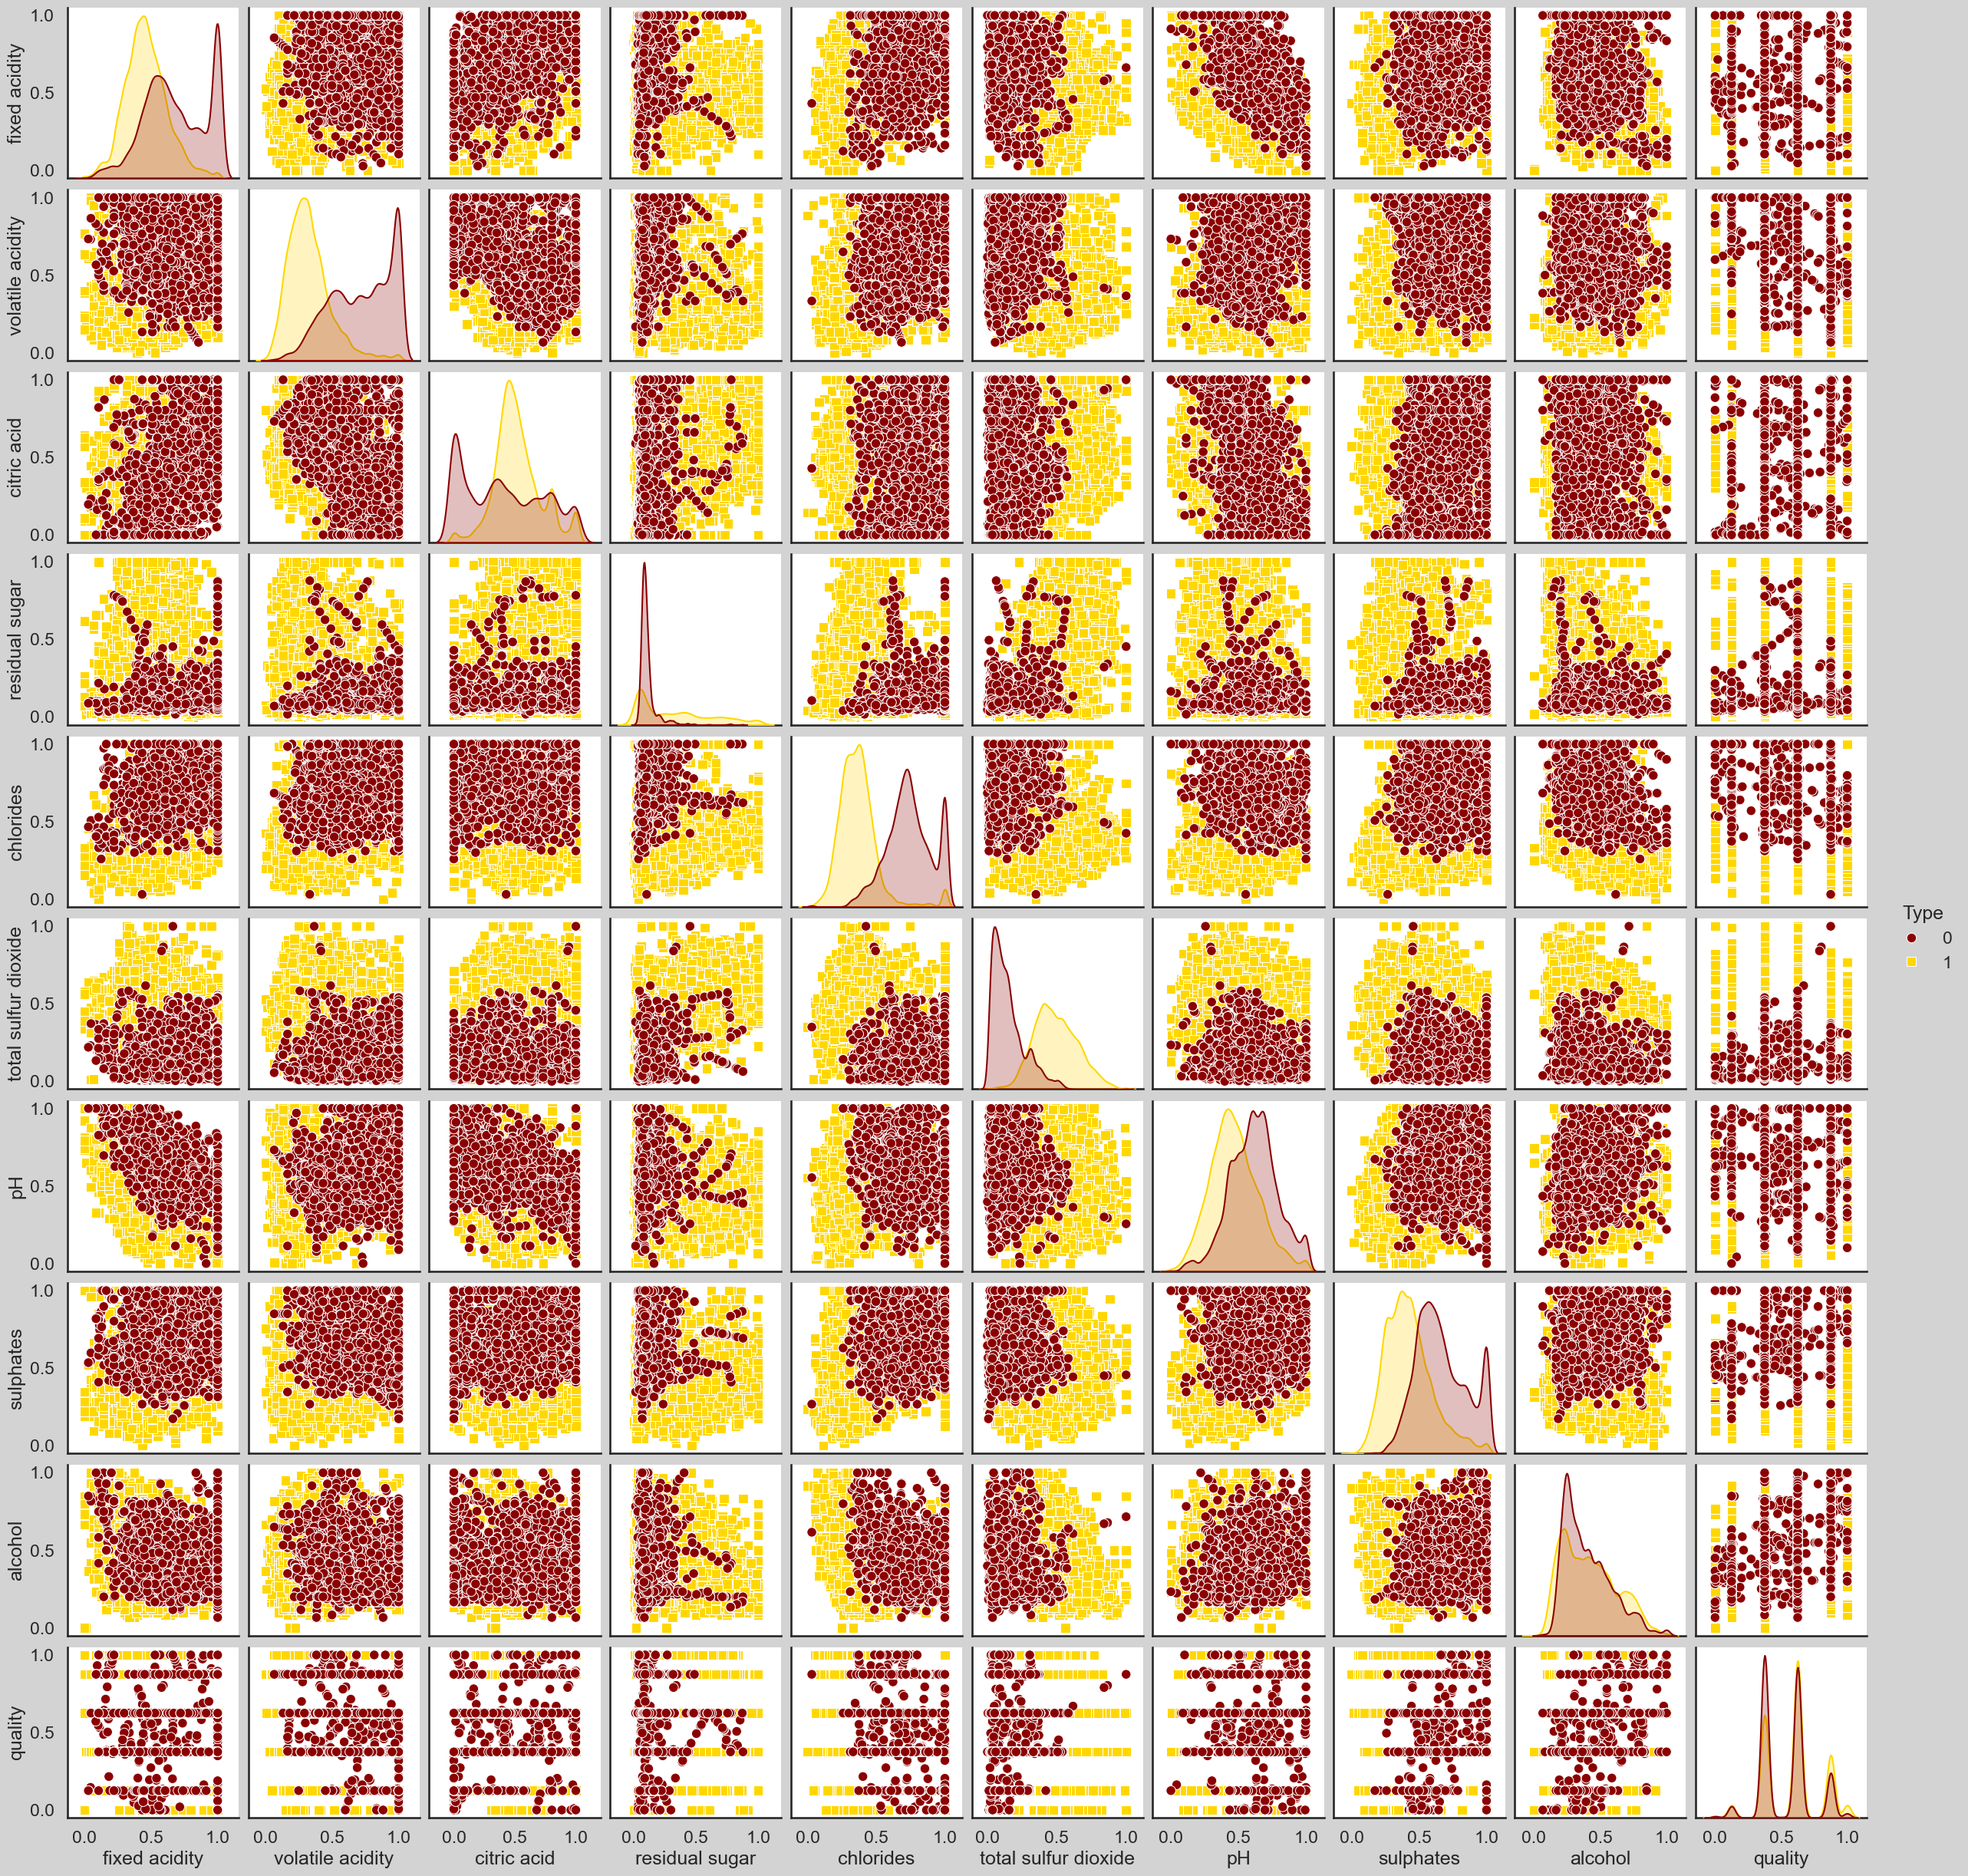

In [145]:
resampled_dataset = X_train_cl_resampled.copy()
resampled_dataset['Type'] = y_train_cl_resampled

# Pair plot delle feature colorate per classe con sfondo grigio chiaro
g = sns.pairplot(
    resampled_dataset,
    hue="Type",
    diag_kind="kde",
    markers=["o", "s"],
    palette={1: "gold", 0: "darkred"}
)

g.fig.patch.set_facecolor('lightgray')  # or g.figure.set_facecolor(...)
plt.show()

## Classificazione

In [120]:
# CLASSIFICAZIONE BINARIA - TYPE (WW/RW)

classification_models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000,
        C=1.0
    ),
        
    'SVM (RBF)': SVC(
        random_state=42, 
        probability=True, 
        kernel='rbf',
        gamma='scale',
        C=1.0
    ),
    
    'SVM (Linear)': SVC(
        random_state=42, 
        probability=True, 
        kernel='linear',
        C=1.0
    ),
    
    'KNN Classifier': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    ),
    
    'AdaBoost Classifier': AdaBoostClassifier(
        n_estimators=100, 
        random_state=42,
        learning_rate=1.0
    )
}

print("TARGET: Type (White Wine, Red Wine)")
print("\nModelli per classificazione:")
for i, name in enumerate(classification_models.keys(), 1):
    print(f"{i:2d}. {name}")

TARGET: Type (White Wine, Red Wine)

Modelli per classificazione:
 1. Logistic Regression
 2. SVM (RBF)
 3. SVM (Linear)
 4. KNN Classifier
 5. AdaBoost Classifier


##  Train e validation K-FOLD

In [ ]:
# Configurazione K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Dizionario per salvare i risultati
results = {}

# Training e validazione per ogni modello
for model_idx, (name, model) in enumerate(classification_models.items(), 1):
    print(f"\n{'='*60}")
    print(f"MODELLO {model_idx}/{len(classification_models)}: {name}")
    print(f"{'='*60}")
    
    # Liste per salvare le metriche di ogni fold
    fold_accuracies = []
    fold_f1_scores = []
    
    # K-Fold Cross Validation
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_cl_resampled), 1):
        # Split dei dati per il fold corrente
        X_train_fold = X_train_cl_resampled.iloc[train_idx]
        X_val_fold = X_train_cl_resampled.iloc[val_idx]
        y_train_fold = y_train_cl_resampled.iloc[train_idx]
        y_val_fold = y_train_cl_resampled.iloc[val_idx]
        
        # Training del modello
        model.fit(X_train_fold, y_train_fold)
        
        # Predizioni train e validation
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Calcolo metriche train e validation
        train_acc = accuracy_score(y_train_fold, y_train_pred)
        val_acc = accuracy_score(y_val_fold, y_val_pred)
        train_f1 = f1_score(y_train_fold, y_train_pred, average='weighted')
        val_f1 = f1_score(y_val_fold, y_val_pred, average='weighted')
        
        fold_accuracies.append(val_acc)
        fold_f1_scores.append(val_f1)
        
        print(f"Fold {fold} - Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Train F1: {train_f1:.4f} | Val F1: {val_f1:.4f}")
    
    print("K-Fold Cross Validation completata!")


    # Riepilogo Cross Validation
    cv_acc_mean = np.mean(fold_accuracies)
    cv_acc_std = np.std(fold_accuracies)
    cv_f1_mean = np.mean(fold_f1_scores)
    cv_f1_std = np.std(fold_f1_scores)
    
    
    # Training finale sul dataset completo
    model.fit(X_train_cl_resampled, y_train_cl_resampled)
    print("Training finale completato!")
    
    # Valutazione sul test set
    y_test_pred = model.predict(X_test_cl_scaled)
    
    # Metriche finali
    test_acc = accuracy_score(y_test_cl, y_test_pred)
    test_f1 = f1_score(y_test_cl, y_test_pred, average='weighted')
    cm = confusion_matrix(y_test_cl, y_test_pred)
    
    # ROC curve e AUC
    try:
        y_prob = model.predict_proba(X_test_cl_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test_cl, y_prob)
        roc_auc = auc(fpr, tpr)
    except Exception:
        fpr, tpr, roc_auc = None, None, None
    
    # Salva risultati
    results[name] = {
        'cv_accuracy': cv_acc_mean,
        'cv_f1': cv_f1_mean,
        'test_accuracy': test_acc,
        'test_f1': test_f1,
        'conf_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc,
        'model': model
    }
    
    print(f"\nRISULTATI FINALI PER {name}:")
    print(f"   CV Accuracy: {cv_acc_mean:.4f} (±{cv_acc_std:.4f})")
    print(f"   CV F1-Score: {cv_f1_mean:.4f} (±{cv_f1_std:.4f})")
    print(f"   Test Accuracy: {test_acc:.4f}")
    print(f"   Test F1-Score: {test_f1:.4f}")
    if roc_auc:
        print(f"   AUC-ROC: {roc_auc:.4f}")
    
    # Classification Report dettagliato
    print(f"\nCLASSIFICATION REPORT - {name}:")
    target_names = ['Red Wine', 'White Wine']
    print(classification_report(y_test_cl, y_test_pred, target_names=target_names))
    print(f"{'='*60}")



MODELLO 1/5: Logistic Regression
Fold 1 - Train Acc: 0.9918 | Val Acc: 0.9889 | Train F1: 0.9918 | Val F1: 0.9889
Fold 2 - Train Acc: 0.9914 | Val Acc: 0.9921 | Train F1: 0.9914 | Val F1: 0.9921
Fold 3 - Train Acc: 0.9917 | Val Acc: 0.9909 | Train F1: 0.9917 | Val F1: 0.9909
Fold 4 - Train Acc: 0.9912 | Val Acc: 0.9956 | Train F1: 0.9912 | Val F1: 0.9956
Fold 5 - Train Acc: 0.9915 | Val Acc: 0.9927 | Train F1: 0.9915 | Val F1: 0.9927
Fold 6 - Train Acc: 0.9915 | Val Acc: 0.9924 | Train F1: 0.9915 | Val F1: 0.9924
Fold 7 - Train Acc: 0.9920 | Val Acc: 0.9889 | Train F1: 0.9920 | Val F1: 0.9889
Fold 8 - Train Acc: 0.9920 | Val Acc: 0.9895 | Train F1: 0.9920 | Val F1: 0.9895
Fold 9 - Train Acc: 0.9918 | Val Acc: 0.9921 | Train F1: 0.9918 | Val F1: 0.9921
Fold 10 - Train Acc: 0.9915 | Val Acc: 0.9921 | Train F1: 0.9915 | Val F1: 0.9921
K-Fold Cross Validation completata!
Training finale completato!

RISULTATI FINALI PER Logistic Regression:
   CV Accuracy: 0.9915 (±0.0020)
   CV F1-Score:

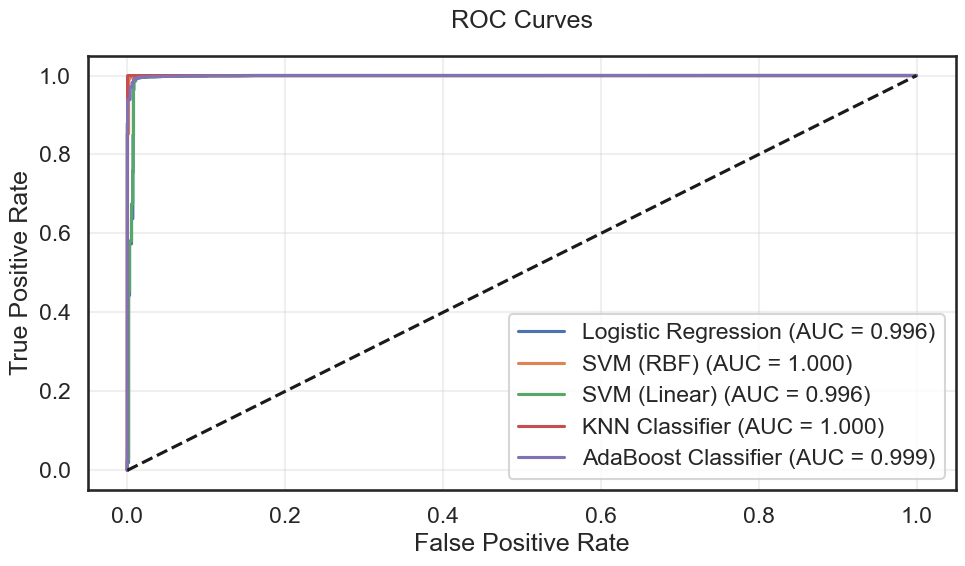

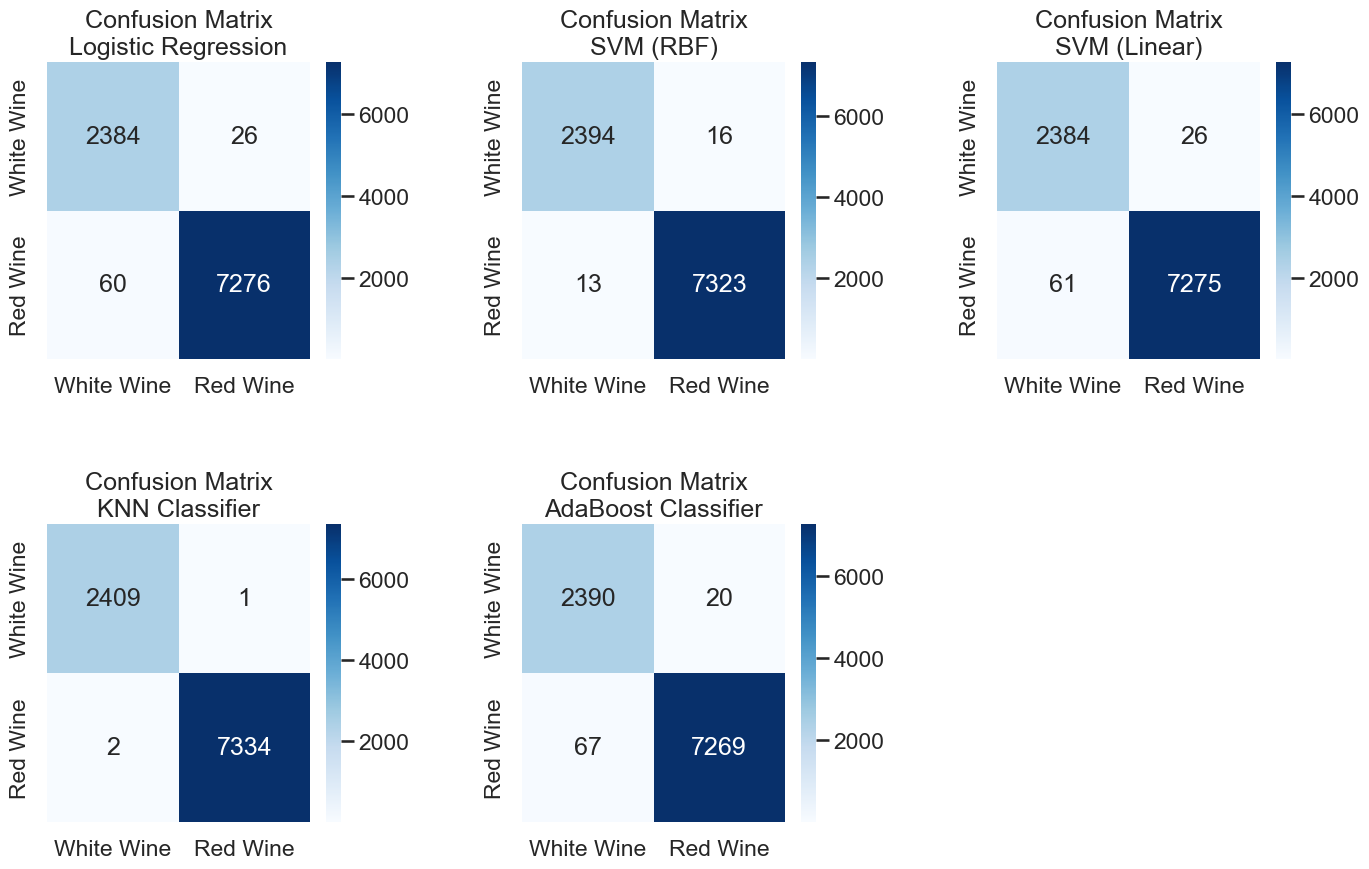


CLASSIFICA MODELLI PER TEST ACCURACY:
1° posto: KNN Classifier
   Accuracy: 0.9997
   F1-Score: 0.9997
   AUC-ROC:  0.9997
--------------------------------------------------
2° posto: SVM (RBF)
   Accuracy: 0.9970
   F1-Score: 0.9970
   AUC-ROC:  0.9997
--------------------------------------------------
3° posto: Logistic Regression
   Accuracy: 0.9912
   F1-Score: 0.9912
   AUC-ROC:  0.9956
--------------------------------------------------
4° posto: SVM (Linear)
   Accuracy: 0.9911
   F1-Score: 0.9911
   AUC-ROC:  0.9957
--------------------------------------------------
5° posto: AdaBoost Classifier
   Accuracy: 0.9911
   F1-Score: 0.9911
   AUC-ROC:  0.9994
--------------------------------------------------


In [122]:
# Visualizzazione ROC Curves
plt.figure(figsize=(10, 6))
for name, res in results.items():
    if res['fpr'] is not None:
        plt.plot(res['fpr'], res['tpr'], label=f'{name} (AUC = {res["auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves', pad=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Visualizzazione matrici di confusione per tutti i modelli
n_models = len(results)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for idx, (name, res) in enumerate(results.items()):
    sns.heatmap(res['conf_matrix'], 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=['White Wine', 'Red Wine'],
                yticklabels=['White Wine', 'Red Wine'],
                ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix\n{name}')
    
# Rimuovi eventuali subplot vuoti
for idx in range(len(results), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(pad=3)
plt.show()

# Classifica modelli
print("\nCLASSIFICA MODELLI PER TEST ACCURACY:")
print("="*50)
results_df = pd.DataFrame({
    'Model': results.keys(),
    'Test Accuracy': [res['test_accuracy'] for res in results.values()],
    'F1-Score': [res['test_f1'] for res in results.values()],
    'AUC-ROC': [res['auc'] if res['auc'] is not None else 'N/A' for res in results.values()]
}).sort_values(by='Test Accuracy', ascending=False)

# Formatta i risultati come classifica
for i, (idx, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i}° posto: {row['Model']}")
    print(f"   Accuracy: {row['Test Accuracy']:.4f}")
    print(f"   F1-Score: {row['F1-Score']:.4f}")
    print(f"   AUC-ROC:  {row['AUC-ROC']:.4f}")
    print("-"*50)

### Grid Search per ottimizzare AdaBoost


Avvio Grid Search...
Fitting 10 folds for each of 12 candidates, totalling 120 fits

RISULTATI DETTAGLIATI GRID SEARCH:
Rank N_Estimators Learning_Rate  CV_Accuracy  CV_Std  
--------------------------------------------------------------------------------
1    200          1.0            0.9936       0.0012  
2    200          0.5            0.9922       0.0022  
3    100          1.0            0.9921       0.0012  
4    100          0.5            0.9912       0.0023  
5    50           1.0            0.9902       0.0024  
6    50           0.5            0.9899       0.0024  
7    200          0.1            0.9890       0.0018  
8    100          0.1            0.9868       0.0020  
9    50           0.1            0.9781       0.0019  
10   200          0.01           0.9698       0.0030  
11   100          0.01           0.9350       0.0046  
12   50           0.01           0.9233       0.0071  
MIGLIORI PARAMETRI: {'learning_rate': 1.0, 'n_estimators': 200}
MIGLIOR ACCURACY CV

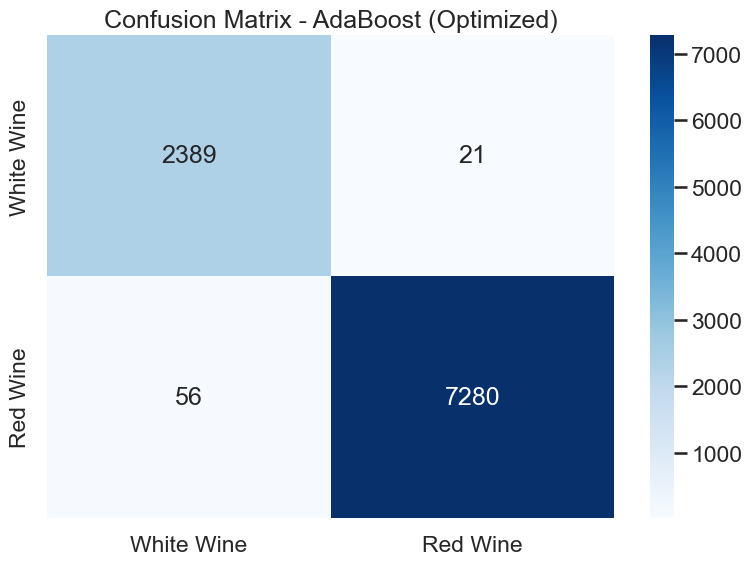

In [ ]:
# Definizione dei parametri da testare
param_grid = {
    'n_estimators': [50, 100, 200],  # Numero di stimatori
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Tasso di apprendimento
}

# Inizializzazione del modello base
base_model = AdaBoostClassifier(random_state=42)

# Configurazione Grid Search con K-Fold CV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,  # Usa tutti i processori disponibili
    verbose=1
)

# Training della Grid Search
print("\nAvvio Grid Search...")
grid_search.fit(X_train_cl_resampled, y_train_cl_resampled)

# Risultati dettagliati per ogni combinazione
print("\nRISULTATI DETTAGLIATI GRID SEARCH:")
print("="*80)

# Estrai i risultati per ogni combinazione
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']

# Ordina per accuracy decrescente
sorted_indices = np.argsort(mean_scores)[::-1]

print(f"{'Rank':<4} {'N_Estimators':<12} {'Learning_Rate':<14} {'CV_Accuracy':<12} {'CV_Std':<8}")
print("-"*80)

for i, idx in enumerate(sorted_indices, 1):
    n_est = params[idx]['n_estimators']
    lr = params[idx]['learning_rate']
    acc = mean_scores[idx]
    std = std_scores[idx]
    print(f"{i:<4} {n_est:<12} {lr:<14} {acc:<12.4f} {std:<8.4f}")

print("="*80)
print(f"MIGLIORI PARAMETRI: {grid_search.best_params_}")
print(f"MIGLIOR ACCURACY CV: {grid_search.best_score_:.4f}")
print("="*80)

# Valutazione sul test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_cl_scaled)

# Metriche finali
test_accuracy = accuracy_score(y_test_cl, y_pred)
test_f1 = f1_score(y_test_cl, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_cl, y_pred)

print("\nPERFORMANCE SUL TEST SET (MODELLO MIGLIORE):")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Visualizzazione matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['White Wine', 'Red Wine'],
            yticklabels=['White Wine', 'Red Wine'])
plt.title('Confusion Matrix - AdaBoost (Optimized)')
plt.tight_layout()
plt.show()

# Regressione


In [27]:
# DEFINIZIONE MODELLI DI REGRESSIONE

regression_models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "ElasticNet": ElasticNet(random_state=42)
}

## Tain e validation con K-FOLD + test

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results_reg = {}

for name, model in regression_models.items():
    print(f"\nValutazione modello: {name}")
    cv_rmse, cv_mae, cv_r2 = [], [], []
    for train_idx, val_idx in kf.split(X_train_reg_scaled):
        X_tr, X_val = X_train_reg_scaled.iloc[train_idx], X_train_reg_scaled.iloc[val_idx]
        y_tr, y_val = y_train_reg.iloc[train_idx], y_train_reg.iloc[val_idx]
        model.fit(X_tr, y_tr)
        y_val_pred = model.predict(X_val)
        cv_rmse.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
        cv_mae.append(mean_absolute_error(y_val, y_val_pred))
        cv_r2.append(r2_score(y_val, y_val_pred))
    model.fit(X_train_reg_scaled, y_train_reg)
    y_test_pred = model.predict(X_test_reg_scaled)
    test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))
    test_mae = mean_absolute_error(y_test_reg, y_test_pred)
    test_r2 = r2_score(y_test_reg, y_test_pred)
    results_reg[name] = {
        "CV_RMSE": np.mean(cv_rmse),
        "CV_MAE": np.mean(cv_mae),
        "CV_R2": np.mean(cv_r2),
        "Test_RMSE": test_rmse,
        "Test_MAE": test_mae,
        "Test_R2": test_r2,
        "y_test_pred": y_test_pred,
        "model": model
    }
    print(f"CV RMSE: {np.mean(cv_rmse):.3f} | CV MAE: {np.mean(cv_mae):.3f} | CV R2: {np.mean(cv_r2):.3f}")
    print(f"Test RMSE: {test_rmse:.3f} | Test MAE: {test_mae:.3f} | Test R2: {test_r2:.3f}")


Valutazione modello: Random Forest
CV RMSE: 0.182 | CV MAE: 0.068 | CV R2: 0.956
Test RMSE: 0.126 | Test MAE: 0.042 | Test R2: 0.979

Valutazione modello: AdaBoost
CV RMSE: 0.182 | CV MAE: 0.068 | CV R2: 0.956
Test RMSE: 0.126 | Test MAE: 0.042 | Test R2: 0.979

Valutazione modello: AdaBoost
CV RMSE: 0.728 | CV MAE: 0.570 | CV R2: 0.302
Test RMSE: 0.737 | Test MAE: 0.582 | Test R2: 0.290

Valutazione modello: XGBoost
CV RMSE: 0.728 | CV MAE: 0.570 | CV R2: 0.302
Test RMSE: 0.737 | Test MAE: 0.582 | Test R2: 0.290

Valutazione modello: XGBoost
CV RMSE: 0.355 | CV MAE: 0.244 | CV R2: 0.834
Test RMSE: 0.341 | Test MAE: 0.238 | Test R2: 0.848

Valutazione modello: ElasticNet
CV RMSE: 0.871 | CV MAE: 0.687 | CV R2: -0.000
Test RMSE: 0.875 | Test MAE: 0.692 | Test R2: -0.000
CV RMSE: 0.355 | CV MAE: 0.244 | CV R2: 0.834
Test RMSE: 0.341 | Test MAE: 0.238 | Test R2: 0.848

Valutazione modello: ElasticNet
CV RMSE: 0.871 | CV MAE: 0.687 | CV R2: -0.000
Test RMSE: 0.875 | Test MAE: 0.692 | Test


Tabella riassuntiva delle metriche sui modelli di regressione:


Modello   CV RMSE    CV MAE     CV R2  Test RMSE  Test MAE   Test R2
0  Random Forest  0.182365  0.068490  0.955886   0.126103  0.041891  0.979225
2        XGBoost  0.354602  0.243795  0.834358   0.340785  0.238171  0.848273
1       AdaBoost  0.727880  0.570265  0.302178   0.737036  0.582275  0.290293
3     ElasticNet  0.871390  0.686539 -0.000056   0.874882  0.691967 -0.000001

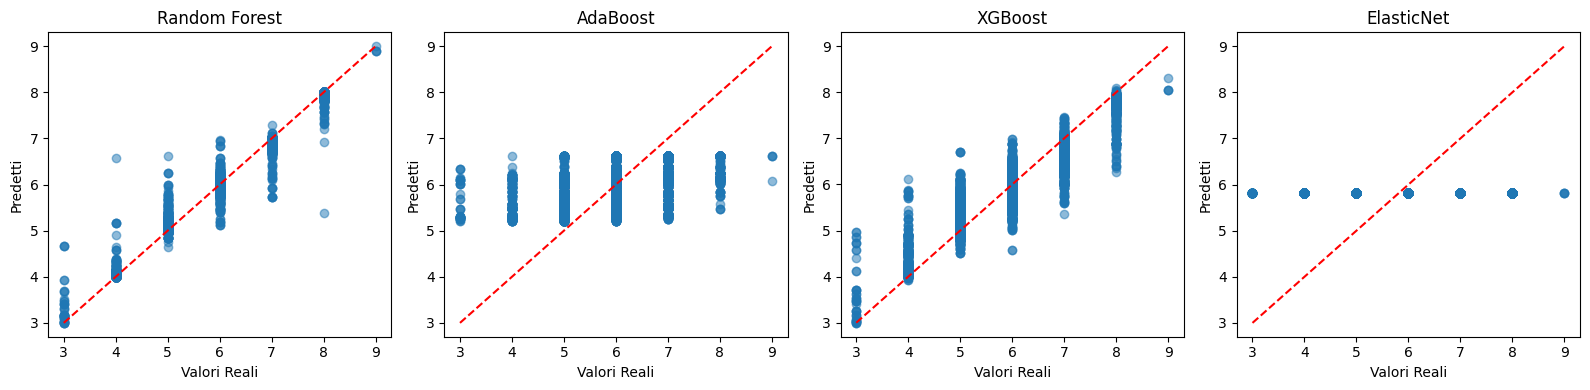

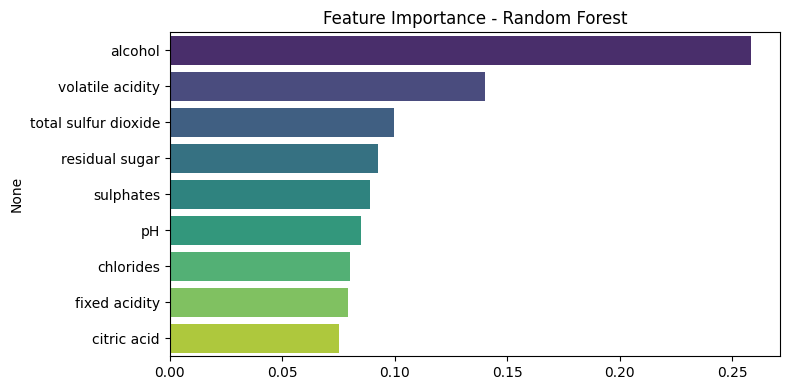

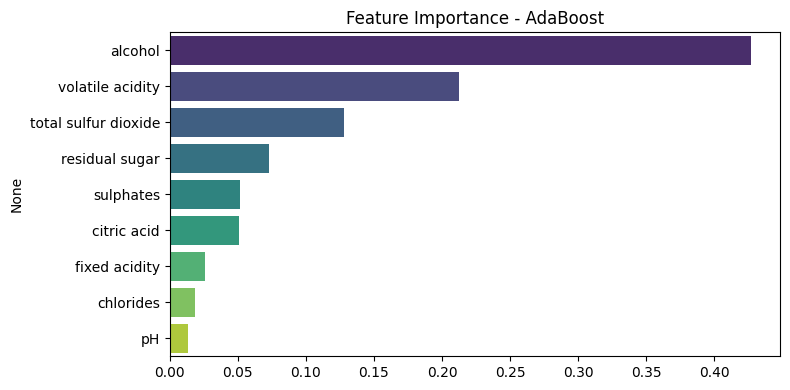

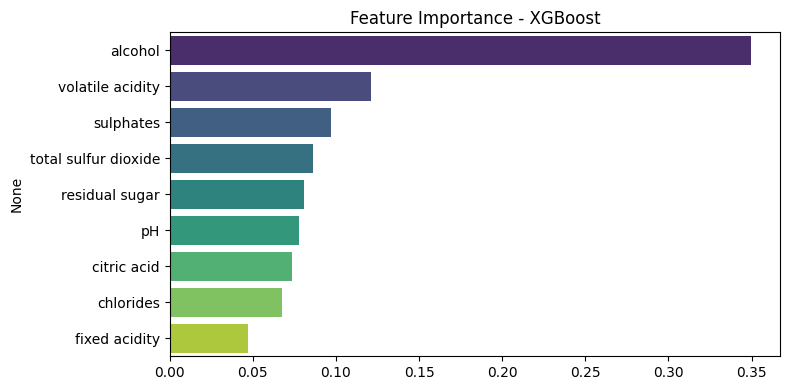

In [31]:
# RISULTATI E CLASSIFICA E PLOT

# Tabella riassuntiva
results_df = pd.DataFrame([
    {
        "Modello": name,
        "CV RMSE": res["CV_RMSE"],
        "CV MAE": res["CV_MAE"],
        "CV R2": res["CV_R2"],
        "Test RMSE": res["Test_RMSE"],
        "Test MAE": res["Test_MAE"],
        "Test R2": res["Test_R2"]
    }
    for name, res in results_reg.items()
]).sort_values(by="Test R2", ascending=False)

print("\nTabella riassuntiva delle metriche sui modelli di regressione:")
display(results_df)

# Scatter plot y_test vs y_pred
plt.figure(figsize=(16, 4))
for i, (name, res) in enumerate(results_reg.items()):
    plt.subplot(1, len(results_reg), i+1)
    plt.scatter(y_test_reg, res["y_test_pred"], alpha=0.5)
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
    plt.xlabel("Valori Reali")
    plt.ylabel("Predetti")
    plt.title(name)
plt.tight_layout()
plt.show()

# Feature importance
for name, res in results_reg.items():
    model = res["model"]
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feat_imp = pd.Series(importances, index=X_train_reg_scaled.columns).sort_values(ascending=False)
        plt.figure(figsize=(8, 4))
        sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
        plt.title(f"Feature Importance - {name}")
        plt.tight_layout()
        plt.show()

## GRID SEARCH XGBoost


Avvio Grid Search su XGBoost...
Fitting 10 folds for each of 72 candidates, totalling 720 fits

RISULTATI GRID SEARCH XGBoost:
Migliori parametri: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Miglior RMSE CV: 0.1524

PERFORMANCE SUL TEST SET (XGBoost ottimizzato):
Test RMSE: 0.1268
Test MAE: 0.0546
Test R2: 0.9790

RISULTATI GRID SEARCH XGBoost:
Migliori parametri: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Miglior RMSE CV: 0.1524

PERFORMANCE SUL TEST SET (XGBoost ottimizzato):
Test RMSE: 0.1268
Test MAE: 0.0546
Test R2: 0.9790


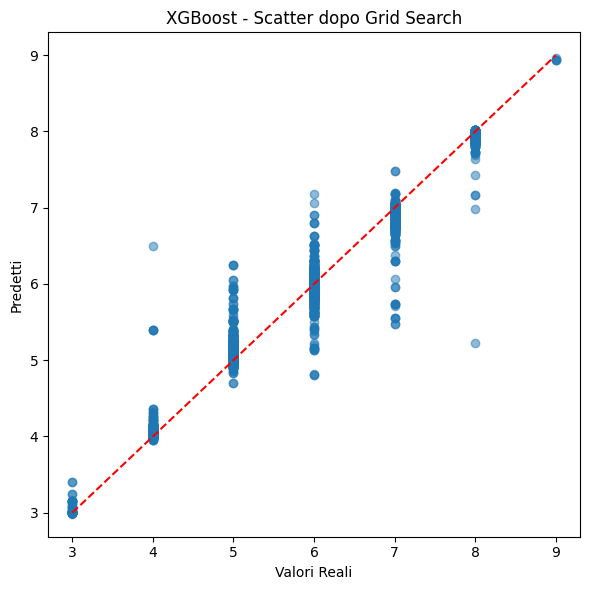

In [ ]:
# Definizione griglia di parametri per XGBoost
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42, verbosity=0)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

print("\nAvvio Grid Search su XGBoost...")
grid_search.fit(X_train_reg_scaled, y_train_reg)

print("\nRISULTATI GRID SEARCH XGBoost:")
print(f"Migliori parametri: {grid_search.best_params_}")
print(f"Miglior RMSE CV: {np.sqrt(-grid_search.best_score_):.4f}")

# Valutazione sul test set
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test_reg_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
test_mae = mean_absolute_error(y_test_reg, y_pred)
test_r2 = r2_score(y_test_reg, y_pred)

print("\nPERFORMANCE SUL TEST SET (XGBoost ottimizzato):")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R2: {test_r2:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Valori Reali")
plt.ylabel("Predetti")
plt.title("XGBoost - Scatter dopo Grid Search")
plt.tight_layout()
plt.show()

# Clusterizzazione

## K-means

In [85]:
# CLUSTERIZZAZIONE: Preparazione dati con PCA per spiegare 95% varianza

# Preparazione dati per clustering
X_cluster = df.copy()
X_cluster = X_cluster.drop(columns=['Type', 'quality'], errors='ignore')  # Rimuovi target variables

print(f"Dataset originale: {X_cluster.shape[1]} features, {X_cluster.shape[0]} campioni")

# Standardizzazione dati
scaler_cluster = MinMaxScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print("Standardizzazione completata!")

# PCA per spiegare almeno 95% della varianza
pca_clustering = PCA(n_components=0.95, random_state=42)  # Mantieni 95% della varianza
X_cluster_pca = pca_clustering.fit_transform(X_cluster_scaled)

# Informazioni sulla PCA per clustering
n_components = pca_clustering.n_components_
explained_variance_ratio = pca_clustering.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print(f"\nPCA PER CLUSTERING:")
print(f"Componenti necessarie per 95% varianza: {n_components}")
print(f"Varianza spiegata: {cumulative_variance[-1]:.1%}")
print(f"Features ridotte da {X_cluster.shape[1]} a {n_components}")

# DataFrame per clustering con tutte le componenti PCA
X_cluster_pca_df = pd.DataFrame(X_cluster_pca, 
                               columns=[f'PC{i+1}' for i in range(n_components)])

print(f"\nDataset per clustering: {X_cluster_pca_df.shape[1]} componenti PCA, {X_cluster_pca_df.shape[0]} campioni")


# Mostra la varianza spiegata per ogni componente (primi 10)
print(f"\nVarianza spiegata per componente (prime 10):")
for i in range(min(10, n_components)):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.1%}")
if n_components > 10:
    print(f"... e altre {n_components-10} componenti")

Dataset originale: 10 features, 32485 campioni
Standardizzazione completata!

PCA PER CLUSTERING:
Componenti necessarie per 95% varianza: 7
Varianza spiegata: 95.4%
Features ridotte da 10 a 7

Dataset per clustering: 7 componenti PCA, 32485 campioni

Varianza spiegata per componente (prime 10):
PC1: 43.2%
PC2: 18.4%
PC3: 13.2%
PC4: 9.8%
PC5: 4.7%
PC6: 3.6%
PC7: 2.5%


### K-MEANS: Determinazione del numero ottimale di cluster sui dati PCA

Calcolo metriche per diversi valori di k sui dati PCA (7 componenti)...
k=2: Inertia=3946.48, Silhouette=0.294
k=3: Inertia=3517.64, Silhouette=0.219
k=4: Inertia=3142.03, Silhouette=0.210
k=5: Inertia=2816.29, Silhouette=0.194
k=6: Inertia=2560.54, Silhouette=0.204
k=7: Inertia=2385.38, Silhouette=0.189
k=8: Inertia=2260.76, Silhouette=0.210


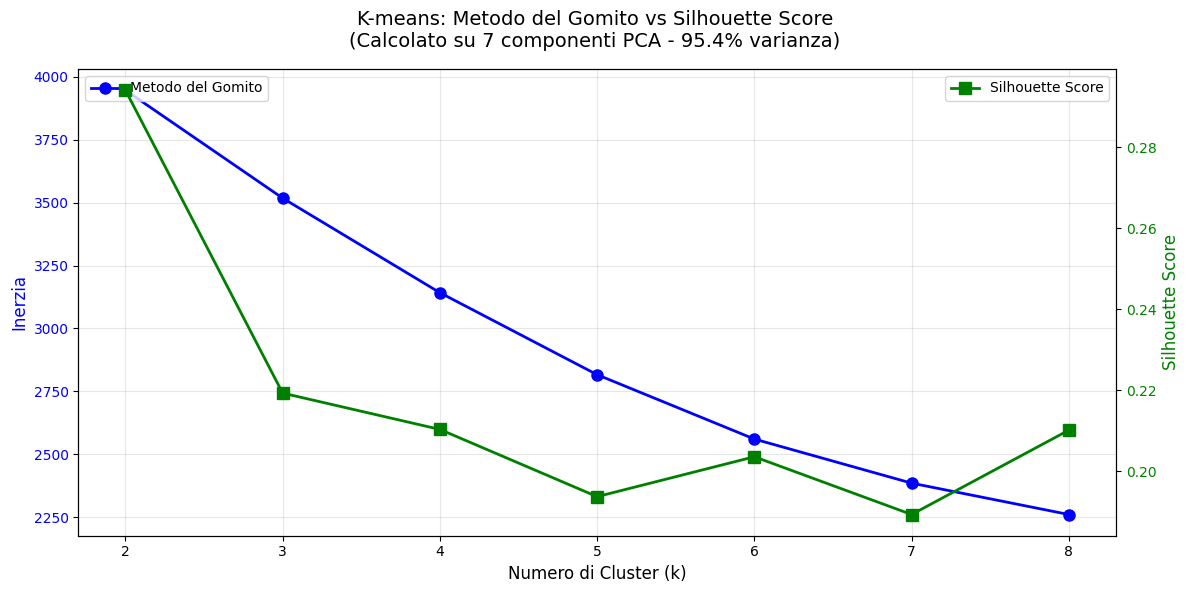


RISULTATI:
Silhouette Score massimo: 0.294 per k=2


In [ ]:
# Valutazione diversi numeri di cluster sui dati PCA
inertia = []  # Per metodo del gomito
silhouette_scores = []  # Per silhouette score
k_range = range(2, 9)

print(f"Calcolo metriche per diversi valori di k sui dati PCA ({n_components} componenti)...")
for k in k_range:
    # Applica K-means con k cluster sui dati PCA
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels_temp = kmeans.fit_predict(X_cluster_pca_df)
    
    # Salva le metriche calcolate sui dati PCA
    inertia.append(kmeans.inertia_)  # Somma distanze quadratiche dai centroidi
    silhouette_scores.append(silhouette_score(X_cluster_pca_df, cluster_labels_temp))
    
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

# Visualizzazione risultati
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico metodo del gomito (inerzia)
ax1.plot(k_range, inertia, marker='o', linewidth=2, markersize=8, label='Metodo del Gomito', color='blue')
ax1.set_xlabel('Numero di Cluster (k)', fontsize=12)
ax1.set_ylabel('Inerzia', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(alpha=0.3)

# Grafico silhouette score (asse secondario)
ax2 = ax1.twinx()
ax2.plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, label='Silhouette Score', color='green')
ax2.set_ylabel('Silhouette Score', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Finalizzazione grafico
fig.suptitle(f'K-means: Metodo del Gomito vs Silhouette Score\n(Calcolato su {n_components} componenti PCA - {cumulative_variance[-1]:.1%} varianza)', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Identifica i valori ottimali
max_silhouette_idx = silhouette_scores.index(max(silhouette_scores))
optimal_k_silhouette = k_range[max_silhouette_idx]

print(f"\nRISULTATI:")
print(f"Silhouette Score massimo: {max(silhouette_scores):.3f} per k={optimal_k_silhouette}")


### K-MEANS: Applicazione finale sui dati PCA

Applicazione K-means con k=2 cluster sui dati PCA...
Testing 10 inizializzazioni diverse per trovare la migliore...
Migliore inizializzazione: #2 con SSE = 3946.48
Silhouette Score finale: 0.294
Centri dei cluster migliori:
[[-2.48861242e-01  3.18049308e-03  2.03384162e-04  7.47104638e-04
  -3.25397514e-04  1.12158164e-04 -2.60249598e-05]
 [ 2.50660350e-01 -3.20348601e-03 -2.04854500e-04 -7.52505728e-04
   3.27749931e-04 -1.12968996e-04  2.62131037e-05]]


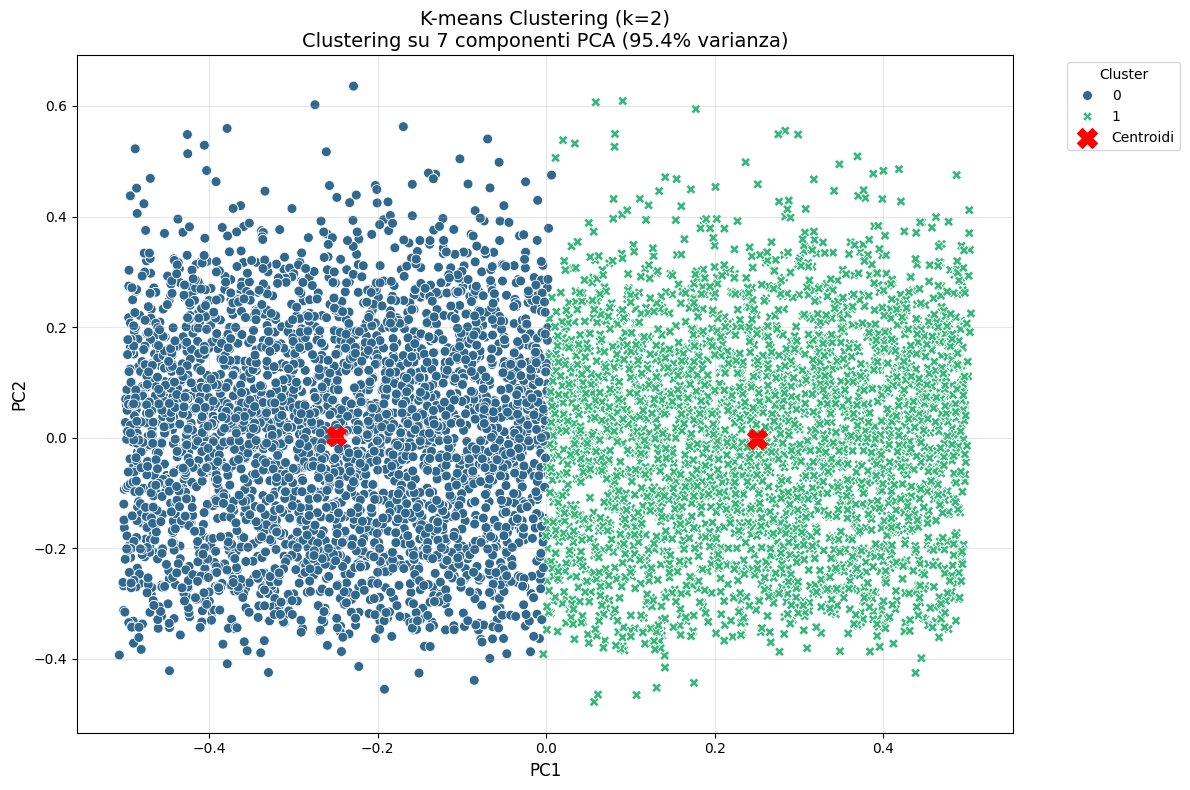


STATISTICHE CLUSTER:
Cluster 0: 16291 campioni (50.1%)
Cluster 1: 16194 campioni (49.9%)


In [ ]:
# Scegli il numero di cluster (basato sui risultati precedenti)
n_clusters_optimal = optimal_k_silhouette  # Usa il valore ottimale dal silhouette score
n_initializations = 10  # Numero di inizializzazioni diverse per trovare la migliore

print(f"Applicazione K-means con k={n_clusters_optimal} cluster sui dati PCA...")
print(f"Testing {n_initializations} inizializzazioni diverse per trovare la migliore...")

sse_list = []
models = []

# Testa diverse inizializzazioni per trovare la migliore
for i in range(n_initializations):
    kmeans = KMeans(n_clusters=n_clusters_optimal, init='random', n_init=1, random_state=i)
    kmeans.fit(X_cluster_pca_df)  # Usa i dati PCA (tutte le componenti)
    sse_list.append(kmeans.inertia_)
    models.append(kmeans)

# Trova il modello con SSE più basso
best_index = np.argmin(sse_list)
best_kmeans = models[best_index]

print(f"Migliore inizializzazione: #{best_index + 1} con SSE = {sse_list[best_index]:.2f}")

# Ottiene le etichette dei cluster sui dati PCA
cluster_labels = best_kmeans.labels_

# Calcola il silhouette score finale sui dati PCA
final_silhouette = silhouette_score(X_cluster_pca_df, cluster_labels)
print(f"Silhouette Score finale: {final_silhouette:.3f}")

# Visualizza i centri dei cluster
print("Centri dei cluster migliori:")
print(best_kmeans.cluster_centers_)

# Visualizzazione dei cluster usando le prime 2 componenti PCA
plt.figure(figsize=(12, 8))

# Crea un DataFrame per la visualizzazione
viz_df = X_cluster_pca_df.copy()
viz_df['cluster'] = cluster_labels

sns.scatterplot(
    x=viz_df.iloc[:, 0],  # Prima dimensione
    y=viz_df.iloc[:, 1],  # Seconda dimensione
    hue=viz_df['cluster'],  # Etichette dei cluster
    palette='viridis',
    style=viz_df['cluster'],
    s=50
)

# Evidenzia i centri dei cluster
centroids = best_kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='red', marker='X', s=200, label='Centroidi'
)

# Finalizzazione grafico
plt.title(f'K-means Clustering (k={n_clusters_optimal})\n' + 
          f'Clustering su {n_components} componenti PCA ({cumulative_variance[-1]:.1%} varianza)', 
          fontsize=14)
plt.xlabel(f'PC1', fontsize=12)
plt.ylabel(f'PC2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Statistiche sui cluster
print(f"\nSTATISTICHE CLUSTER:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count} campioni ({percentage:.1f}%)")



## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) è un algoritmo di clustering basato sulla densità che può trovare cluster di forma arbitraria e identificare punti di rumore (outlier).

### DBSCAN: Parameter tuning per eps usando k-distance plot


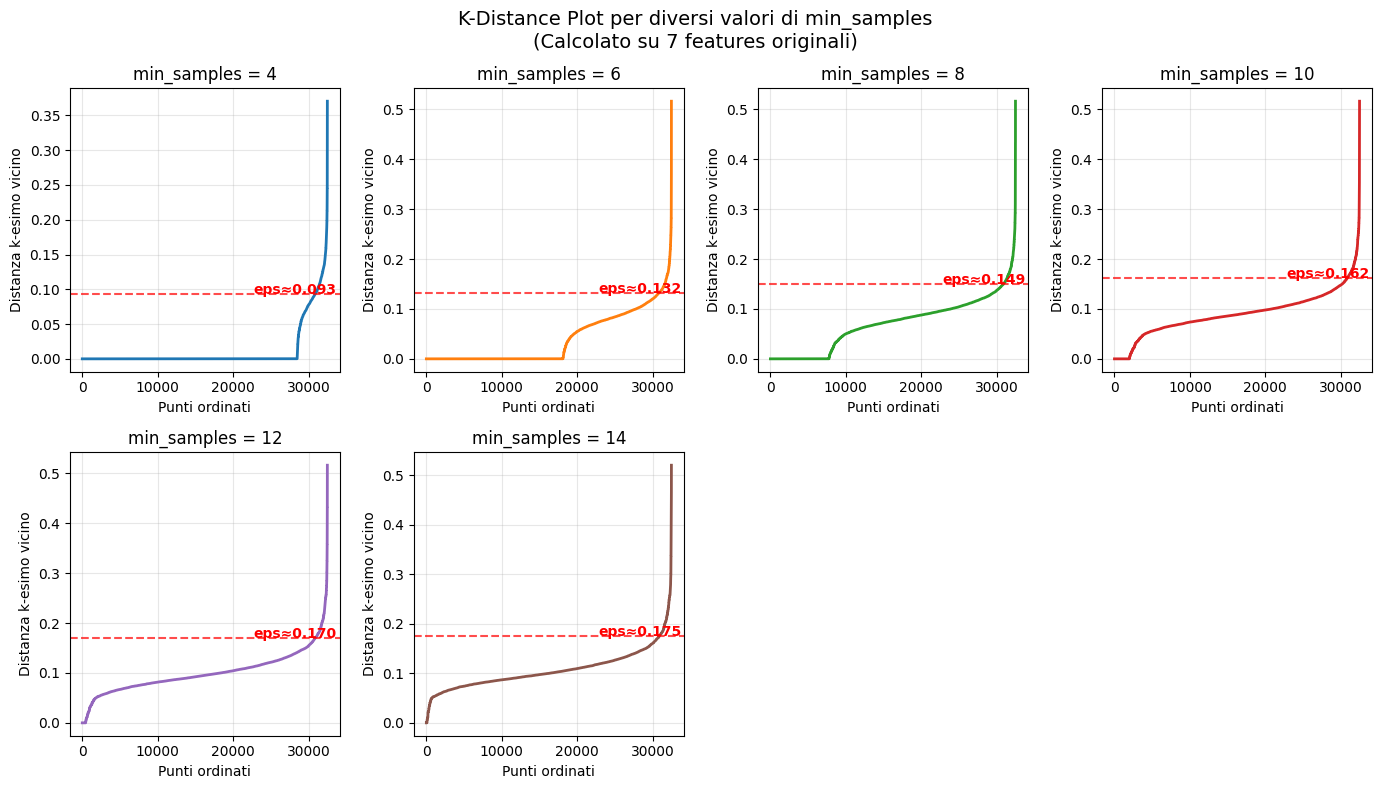


Analisi dettagliata per min_samples = 14:


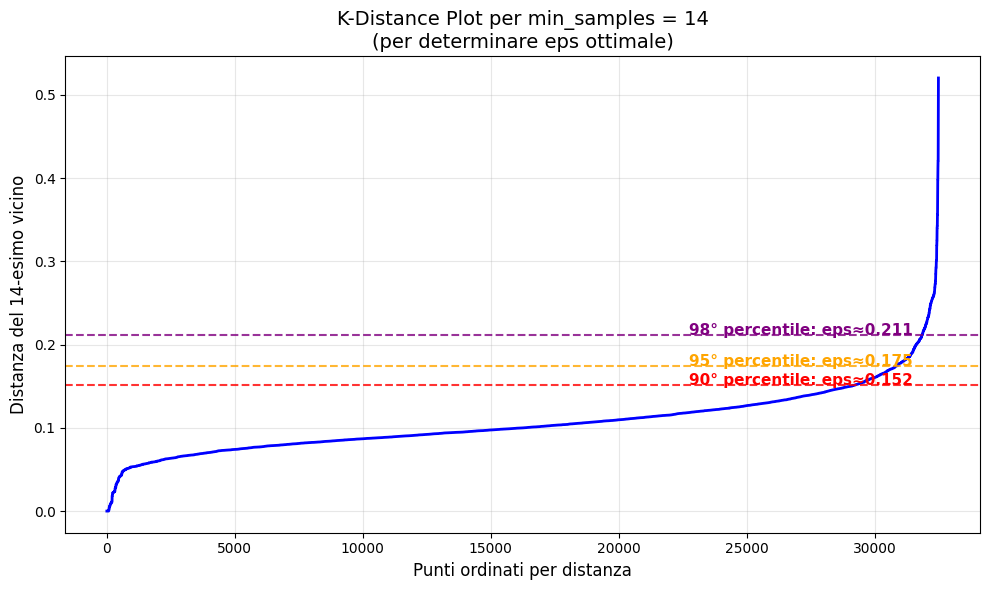

90° percentile: 0.1516
95° percentile: 0.1745
98° percentile: 0.2110


In [ ]:
# Test diversi valori di min_samples per trovare il migliore
selected_min_samples = [4, 6, 8, 10, 12, 14]

plt.figure(figsize=(14, 8))

# Calcolo e rappresentazione delle distanze per diversi min_samples
for i, min_samples in enumerate(selected_min_samples):
    # Calcola k-nearest neighbors sui dati originali (10 features)
    nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
    nearest_neighbors.fit(X_cluster_pca_df)  
    distances, _ = nearest_neighbors.kneighbors(X_cluster_pca_df)

    # Ordina le distanze del k-esimo vicino
    distances = np.sort(distances[:, -1])
    
    plt.subplot(2, 4, i + 1)
    plt.plot(distances, color=f'C{i}', linewidth=2)
    plt.title(f'min_samples = {min_samples}', fontsize=12)
    plt.xlabel('Punti ordinati')
    plt.ylabel('Distanza k-esimo vicino')
    plt.grid(alpha=0.3)
    
    # Suggerisci un valore di eps basato sul "ginocchio"
    # Prendi il 95° percentile come suggerimento per eps
    suggested_eps = np.percentile(distances, 95)
    plt.axhline(y=suggested_eps, color='red', linestyle='--', alpha=0.7)
    plt.text(len(distances)*0.7, suggested_eps, f'eps≈{suggested_eps:.3f}', 
             fontsize=10, color='red', fontweight='bold')

plt.suptitle('K-Distance Plot per diversi valori di min_samples\n' + 
             f'(Calcolato su {X_cluster_pca_df.shape[1]} features originali)', fontsize=14)
plt.tight_layout()
plt.show()

min_samples_chosen = 14
print(f"\nAnalisi dettagliata per min_samples = {min_samples_chosen}:")

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples_chosen)
nearest_neighbors.fit(X_cluster_pca_df)
distances, _ = nearest_neighbors.kneighbors(X_cluster_pca_df)
distances = np.sort(distances[:, -1])

plt.figure(figsize=(10, 6))
plt.plot(distances, linewidth=2, color='blue')
plt.title(f'K-Distance Plot per min_samples = {min_samples_chosen}\n(per determinare eps ottimale)', fontsize=14)
plt.xlabel('Punti ordinati per distanza', fontsize=12)
plt.ylabel(f'Distanza del {min_samples_chosen}-esimo vicino', fontsize=12)
plt.grid(alpha=0.3)

# Suggerisci diversi valori di eps
percentiles = [90, 95, 98]
colors = ['red', 'orange', 'purple']

for p, color in zip(percentiles, colors):
    eps_suggestion = np.percentile(distances, p)
    plt.axhline(y=eps_suggestion, color=color, linestyle='--', alpha=0.8)
    plt.text(len(distances)*0.7, eps_suggestion, f'{p}° percentile: eps≈{eps_suggestion:.3f}', 
             fontsize=11, color=color, fontweight='bold')

plt.tight_layout()
plt.show()

# Calcola statistiche per aiutare nella scelta
print(f"90° percentile: {np.percentile(distances, 90):.4f}")
print(f"95° percentile: {np.percentile(distances, 95):.4f}")
print(f"98° percentile: {np.percentile(distances, 98):.4f}")

### Test di diversi valori di eps

In [ ]:
# Usa i parametri suggeriti dal k-distance plot
min_samples = min_samples_chosen
eps_values = [
    np.percentile(distances, 90),  # Più permissivo
    np.percentile(distances, 95),  # Bilanciato
    np.percentile(distances, 98)   # Più restrittivo
]

print(f"Test DBSCAN con min_samples = {min_samples} e diversi valori di eps:")
print("="*60)

results_dbscan = []

for i, eps in enumerate(eps_values):
    # Applica DBSCAN sui dati originali (10 features)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_cluster_pca_df)
    
    # Calcola statistiche
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    n_clustered = len(dbscan_labels) - n_noise
    
    # Calcola silhouette score (solo per punti non-rumore)
    if n_clusters > 1 and n_clustered > 0:
        # Filtra punti non-rumore per silhouette score
        non_noise_mask = dbscan_labels != -1
        if np.sum(non_noise_mask) > 1:
            silhouette_avg = silhouette_score(X_cluster_pca_df[non_noise_mask], 
                                            dbscan_labels[non_noise_mask])
        else:
            silhouette_avg = -1
    else:
        silhouette_avg = -1
    
    results_dbscan.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'n_clustered': n_clustered,
        'silhouette': silhouette_avg,
        'labels': dbscan_labels
    })
    
    print(f"eps = {eps:.4f}:")
    print(f"  Cluster trovati: {n_clusters}")
    print(f"  Punti rumore: {n_noise} ({n_noise/len(dbscan_labels)*100:.1f}%)")
    print(f"  Punti clusterizzati: {n_clustered} ({n_clustered/len(dbscan_labels)*100:.1f}%)")
    print(f"  Silhouette Score: {silhouette_avg:.3f}" if silhouette_avg > -1 else "  Silhouette Score: N/A")
    print("-"*40)

# Seleziona il miglior risultato (con silhouette score più alto e ragionevole numero di cluster)
valid_results = [r for r in results_dbscan if r['silhouette'] > -1 and r['n_clusters'] > 1]

if valid_results:
    best_result = max(valid_results, key=lambda x: x['silhouette'])
    best_eps = best_result['eps']
    best_labels = best_result['labels']
    
    print(f"\nMIGLIOR RISULTATO:")
    print(f"eps = {best_eps:.4f}")
    print(f"Cluster: {best_result['n_clusters']}")
    print(f"Silhouette Score: {best_result['silhouette']:.3f}")
else:
    # Se nessun risultato è valido, prendi quello con meno rumore
    best_result = min(results_dbscan, key=lambda x: x['n_noise'])
    best_eps = best_result['eps']
    best_labels = best_result['labels']
    print(f"\nNessun risultato ottimale trovato. Scelto quello con meno rumore:")
    print(f"eps = {best_eps:.4f}")

Test DBSCAN con min_samples = 14 e diversi valori di eps:
eps = 0.1516:
  Cluster trovati: 33
  Punti rumore: 2142 (6.6%)
  Punti clusterizzati: 30343 (93.4%)
  Silhouette Score: -0.363
----------------------------------------
eps = 0.1516:
  Cluster trovati: 33
  Punti rumore: 2142 (6.6%)
  Punti clusterizzati: 30343 (93.4%)
  Silhouette Score: -0.363
----------------------------------------
eps = 0.1745:
  Cluster trovati: 10
  Punti rumore: 1013 (3.1%)
  Punti clusterizzati: 31472 (96.9%)
  Silhouette Score: -0.115
----------------------------------------
eps = 0.1745:
  Cluster trovati: 10
  Punti rumore: 1013 (3.1%)
  Punti clusterizzati: 31472 (96.9%)
  Silhouette Score: -0.115
----------------------------------------
eps = 0.2110:
  Cluster trovati: 6
  Punti rumore: 440 (1.4%)
  Punti clusterizzati: 32045 (98.6%)
  Silhouette Score: 0.112
----------------------------------------

MIGLIOR RISULTATO:
eps = 0.2110
Cluster: 6
Silhouette Score: 0.112
eps = 0.2110:
  Cluster trovati:

### Visualizzazione risultati finali

RISULTATI FINALI DBSCAN:
Parametri: eps=0.2110, min_samples=14
Cluster trovati: 6
Punti rumore: 440 (1.4%)
Punti clusterizzati: 32045 (98.6%)


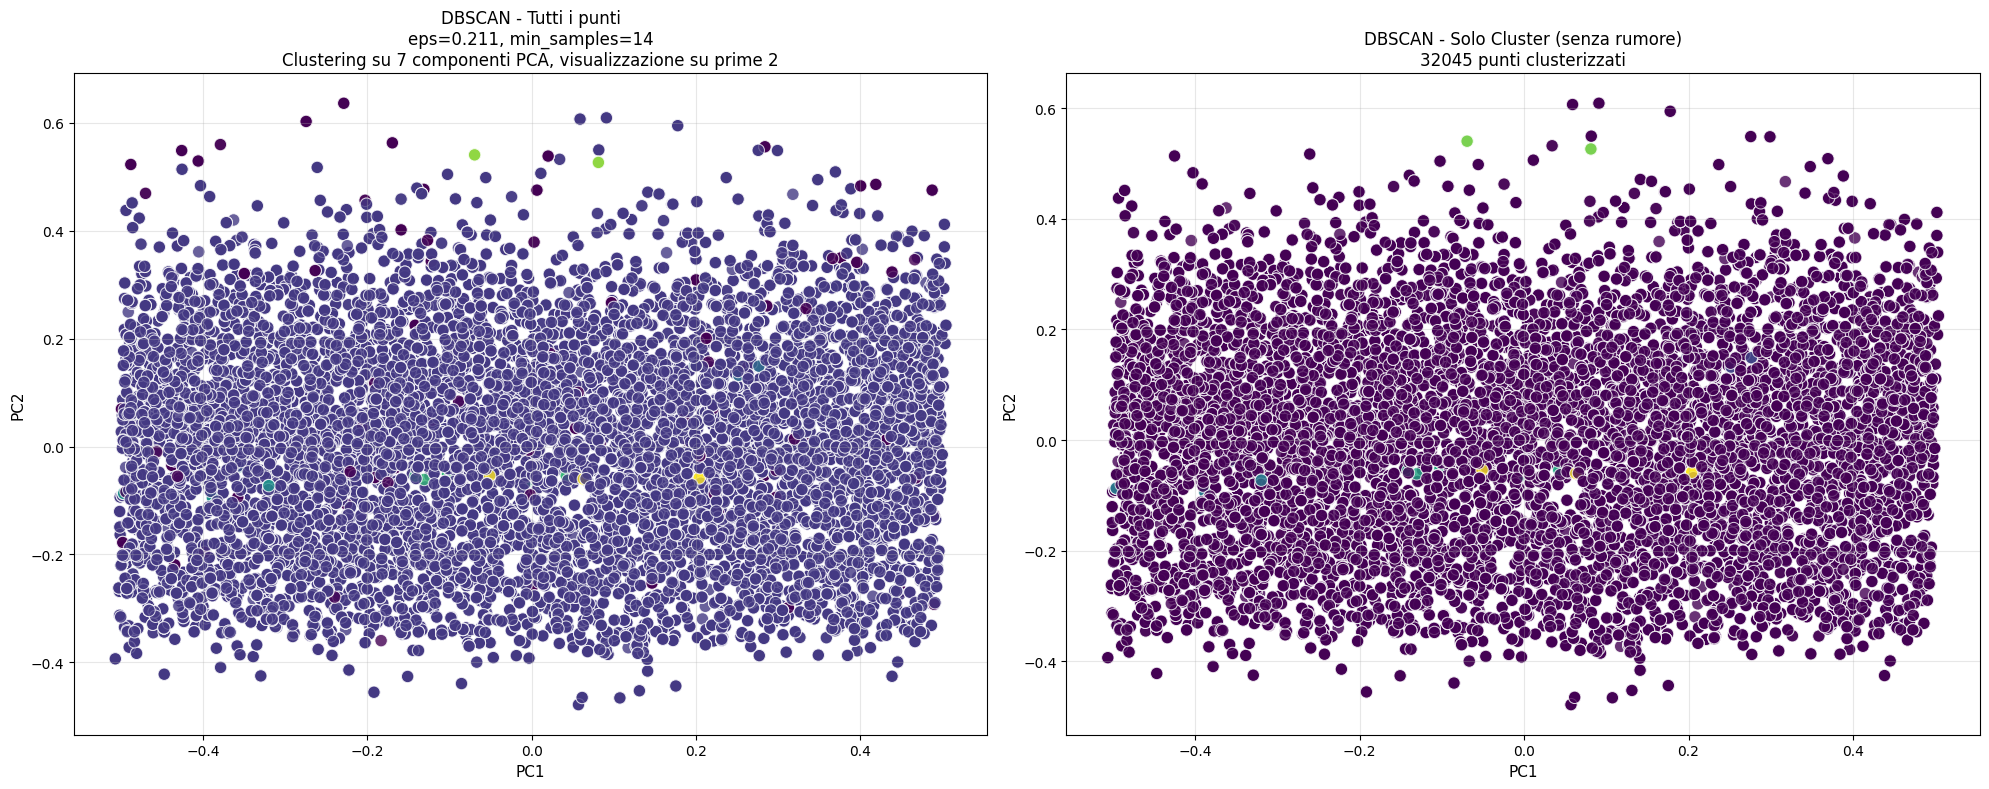


STATISTICHE DETTAGLIATE:
Rumore: 440 punti (1.4%)
Cluster 0: 31928 punti (98.3%)
Cluster 1: 35 punti (0.1%)
Cluster 2: 26 punti (0.1%)
Cluster 3: 26 punti (0.1%)
Cluster 4: 17 punti (0.1%)
Cluster 5: 13 punti (0.0%)


In [ ]:
# Usa i parametri migliori trovati
final_dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
final_labels = final_dbscan.fit_predict(X_cluster_pca_df)

# Statistiche finali
n_clusters_final = len(set(final_labels)) - (1 if -1 in final_labels else 0)
n_noise_final = list(final_labels).count(-1)

print(f"RISULTATI FINALI DBSCAN:")
print(f"Parametri: eps={best_eps:.4f}, min_samples={min_samples}")
print(f"Cluster trovati: {n_clusters_final}")
print(f"Punti rumore: {n_noise_final} ({n_noise_final/len(final_labels)*100:.1f}%)")
print(f"Punti clusterizzati: {len(final_labels)-n_noise_final} ({(len(final_labels)-n_noise_final)/len(final_labels)*100:.1f}%)")

# Crea DataFrame per visualizzazione usando le prime 2 componenti PCA
viz_df_dbscan = X_cluster_pca_df.copy()
viz_df_dbscan['cluster'] = final_labels

# Visualizzazione completa (cluster + rumore)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Grafico 1: Tutti i punti (cluster + rumore)
scatter1 = sns.scatterplot(
    x=viz_df_dbscan.iloc[:, 0],  # Prima dimensione
    y=viz_df_dbscan.iloc[:, 1],  # Seconda dimensione
    hue=viz_df_dbscan['cluster'],  # Etichette dei cluster
    palette='viridis',
    s=80,
    alpha=0.8,
    ax=axes[0],
    legend=False  # RIMUOVI LEGENDA
)


axes[0].set_title(f'DBSCAN - Tutti i punti\neps={best_eps:.3f}, min_samples={min_samples}\n' + 
                  f'Clustering su {n_components} componenti PCA, visualizzazione su prime 2', fontsize=12)
axes[0].set_xlabel(f'PC1', fontsize=11)
axes[0].set_ylabel(f'PC2', fontsize=11)
axes[0].grid(alpha=0.3)

# Grafico 2: Solo cluster (senza rumore)
clustered_data = viz_df_dbscan[viz_df_dbscan['cluster'] != -1]

scatter2 = sns.scatterplot(
    x=clustered_data.iloc[:, 0],  # Prima dimensione
    y=clustered_data.iloc[:, 1],  # Seconda dimensione
    hue=clustered_data['cluster'],  # Etichette dei cluster
    palette='viridis',
    s=80,
    alpha=0.8,
    ax=axes[1],  # CORREZIONE: usa axes[1] invece di axes[0]
    legend=False  # RIMUOVI LEGENDA
)
axes[1].set_title(f'DBSCAN - Solo Cluster (senza rumore)\n{len(clustered_data)} punti clusterizzati', fontsize=12)
axes[1].set_xlabel(f'PC1', fontsize=11)
axes[1].set_ylabel(f'PC2', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiche dettagliate sui cluster
if n_clusters_final > 0:
    print(f"\nSTATISTICHE DETTAGLIATE:")
    cluster_counts = pd.Series(final_labels).value_counts().sort_index()
    
    for cluster_id, count in cluster_counts.items():
        if cluster_id == -1:
            print(f"Rumore: {count} punti ({count/len(final_labels)*100:.1f}%)")
        else:
            print(f"Cluster {cluster_id}: {count} punti ({count/len(final_labels)*100:.1f}%)")
else:
    print("\nNessun cluster identificato da DBSCAN con questi parametri.")